#  Project: Predictive Modelling


# Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


In [1]:
%matplotlib inline 
# Numerical libraries
import numpy as np   
import math

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression


# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")


## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.


In [2]:
cub_df = pd.read_csv("cubic_zirconia.csv")  
cub_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
cub_df.shape

(26967, 11)

In [4]:
cub_df.describe()


,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [5]:
cub_df = cub_df.drop('Unnamed: 0', axis=1)
cub_df.shape

(26967, 10)

In [6]:
cub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
print('There are',cub_df.duplicated().sum(),'duplicates in this dataset')


There are 34 duplicates in this dataset


In [8]:
cub_df[cub_df.duplicated()].head()

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906


In [9]:
cub_df.drop_duplicates(inplace=True)
print('After dropping duplicates there are',cub_df.duplicated().sum(),'duplicates in this dataset')


After dropping duplicates there are 0 duplicates in this dataset


In [10]:
cub_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
cub_df.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,NaN,NaN,NaN,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


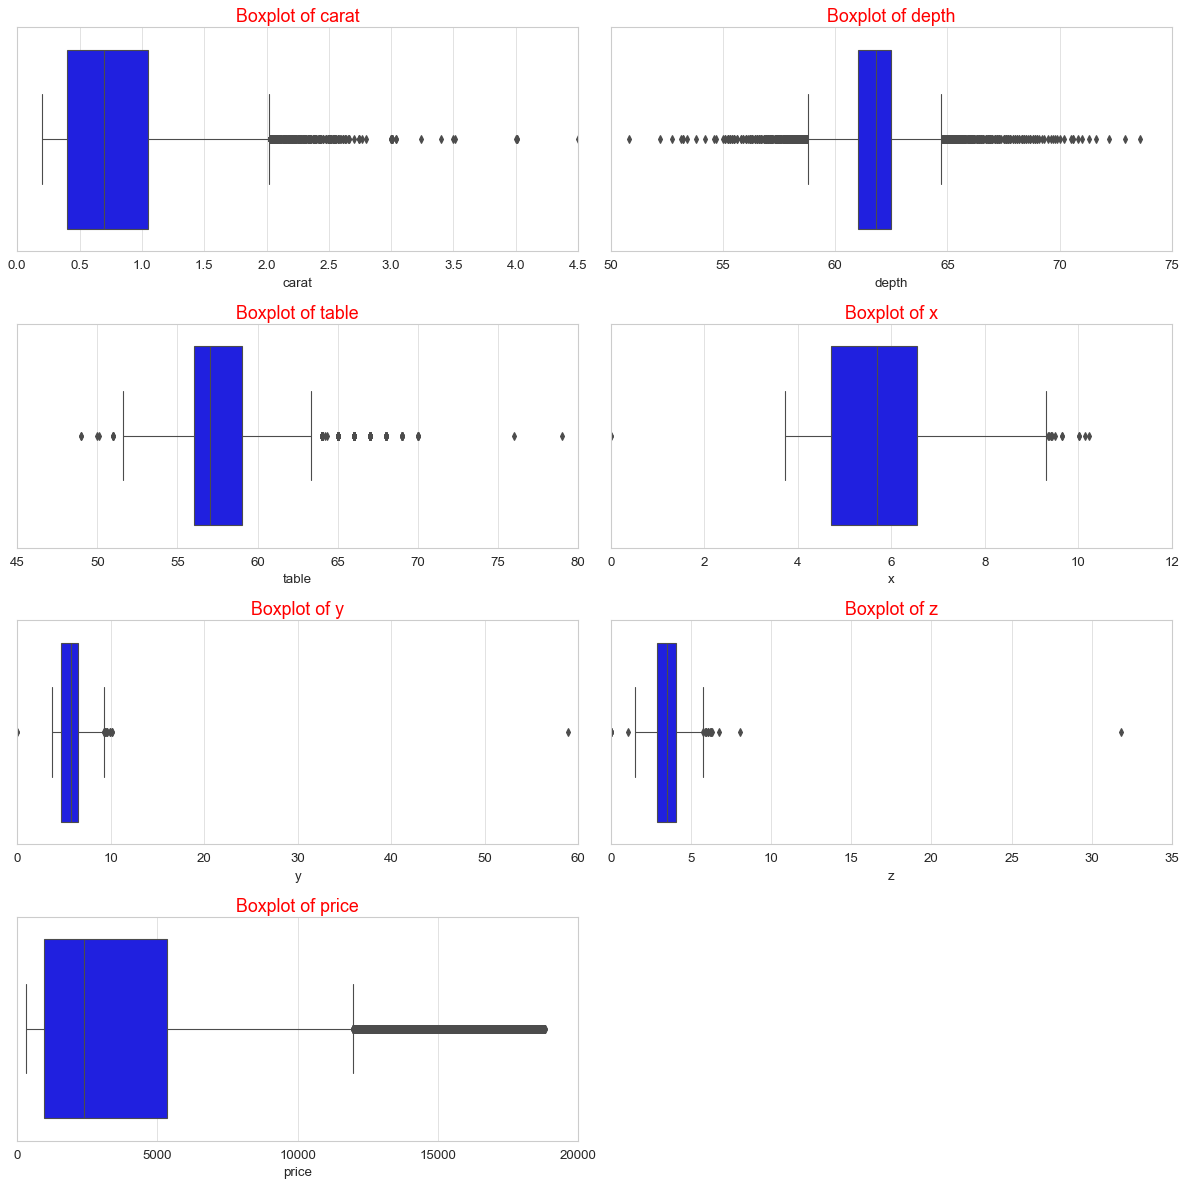

In [12]:
df_num = cub_df.select_dtypes(include = ['float64','int64'])

fig=plt.figure(figsize=(15,15))
for i in range(0,len(df_num.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(x=df_num[df_num.columns[i]])
    plt.title('Boxplot of '+df_num.columns[i],color='Red',fontsize=16)

plt.tight_layout()


In [13]:
def proportion_outlier1(column):
    Q1=df_num[column].quantile(q=0.25)
    Q3=df_num[column].quantile(q=0.75)
    IQR=stats.iqr(df_num[column])   
    
    L_outlier=Q1-1.5*(Q3-Q1)
    U_outlier=Q3+1.5*(Q3-Q1)
    print('Lower outliers in ' +column+ ' is : ', L_outlier)
    print('Upper outliers in ' +column+ ' is : ', U_outlier)
    print('Number of outliers in '+column + ' upper : ', df_num[df_num[column]>U_outlier][column].count())
    print('Number of outliers in '+column + ' lower : ', df_num[df_num[column]<L_outlier][column].count())
    print('% of Outlier in '+column + ' upper: ',round(df_num[df_num[column]>U_outlier][column].count()*100/len(df_num)), '%')
    print('% of Outlier in '+column + ' lower: ',round(df_num[df_num[column]<L_outlier][column].count()*100/len(df_num)), '%')
    print('-----------------------------------------------------')


In [14]:
from scipy import stats

lstnumericcolumns1 = list(df_num.columns.values)

for x in lstnumericcolumns1:
    proportion_outlier1(x)

Lower outliers in carat is :  -0.5750000000000001
Upper outliers in carat is :  2.0250000000000004
Number of outliers in carat upper :  657
Number of outliers in carat lower :  0
% of Outlier in carat upper:  2 %
% of Outlier in carat lower:  0 %
-----------------------------------------------------
Lower outliers in depth is :  58.75
Upper outliers in depth is :  64.75
Number of outliers in depth upper :  486
Number of outliers in depth lower :  733
% of Outlier in depth upper:  2 %
% of Outlier in depth lower:  3 %
-----------------------------------------------------
Lower outliers in table is :  51.5
Upper outliers in table is :  63.5
Number of outliers in table upper :  310
Number of outliers in table lower :  8
% of Outlier in table upper:  1 %
% of Outlier in table lower:  0 %
-----------------------------------------------------
Lower outliers in x is :  1.9500000000000002
Upper outliers in x is :  9.309999999999999
Number of outliers in x upper :  12
Number of outliers in x lo

In [15]:
def univariateAnalysis_numeric1(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(cub_df[column].describe(),end='\n\n')
    print('Interquartile range (IQR) of spending is ', round(stats.iqr(cub_df[column]),3))
    print('Range of values: ', round(cub_df[column].max()-cub_df[column].min(),3),"\n")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(cub_df[column], kde=True, color='g');
    plt.show()


Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64

Interquartile range (IQR) of spending is  0.65
Range of values:  4.3 

Distribution of carat
----------------------------------------------------------------------------


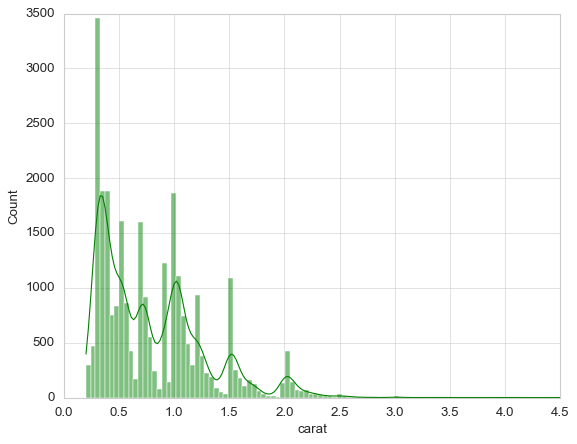

Description of depth
----------------------------------------------------------------------------
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

Interquartile range (IQR) of spending is  nan
Range of values:  22.8 

Distribution of depth
----------------------------------------------------------------------------


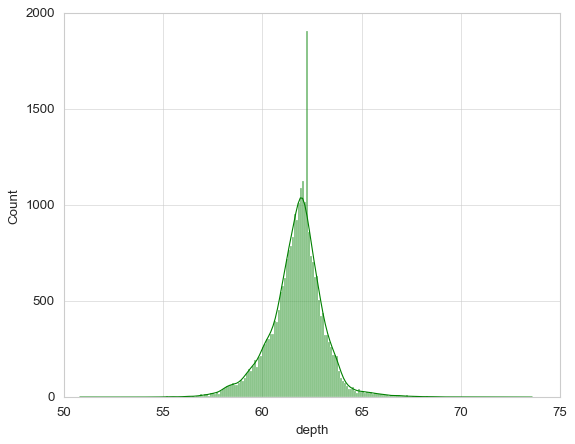

Description of table
----------------------------------------------------------------------------
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64

Interquartile range (IQR) of spending is  3.0
Range of values:  30.0 

Distribution of table
----------------------------------------------------------------------------


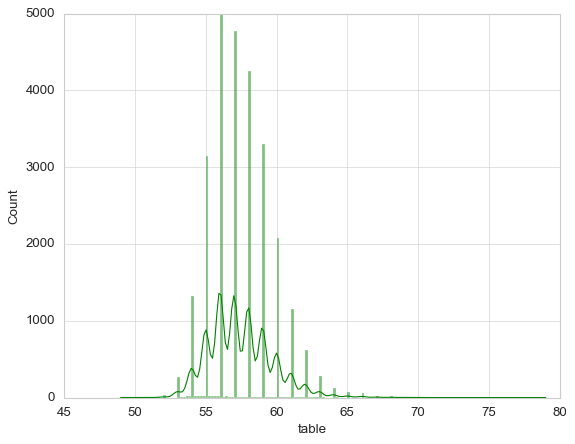

Description of x
----------------------------------------------------------------------------
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64

Interquartile range (IQR) of spending is  1.84
Range of values:  10.23 

Distribution of x
----------------------------------------------------------------------------


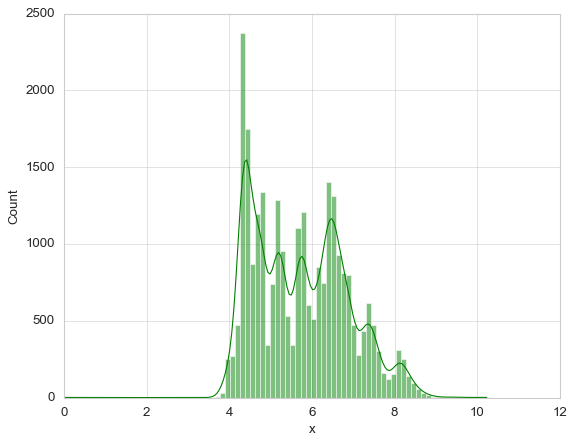

Description of y
----------------------------------------------------------------------------
count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64

Interquartile range (IQR) of spending is  1.83
Range of values:  58.9 

Distribution of y
----------------------------------------------------------------------------


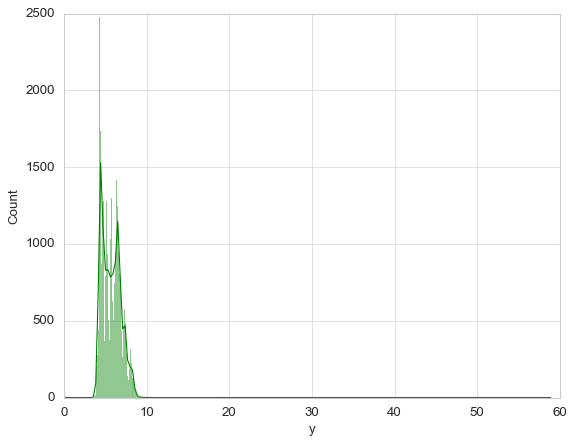

Description of z
----------------------------------------------------------------------------
count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64

Interquartile range (IQR) of spending is  1.14
Range of values:  31.8 

Distribution of z
----------------------------------------------------------------------------


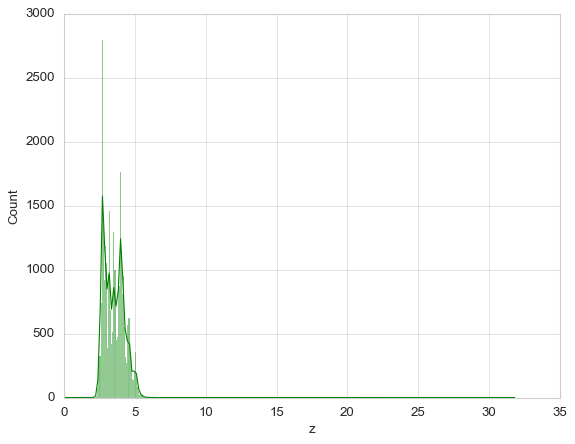

Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64

Interquartile range (IQR) of spending is  4411.0
Range of values:  18492 

Distribution of price
----------------------------------------------------------------------------


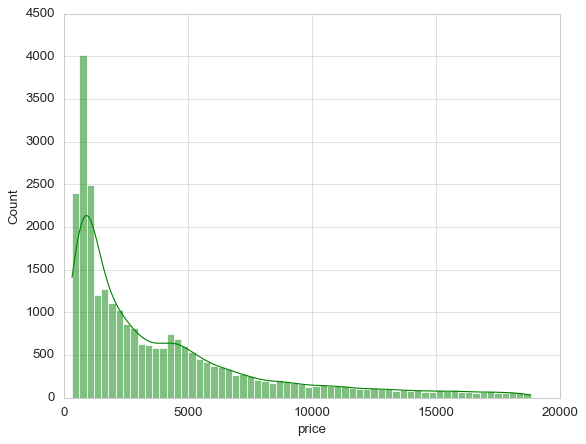

In [16]:
for x in lstnumericcolumns1:
    univariateAnalysis_numeric1(x)


In [17]:
df_obj = cub_df.select_dtypes(include = ['object'])

def univariateAnalysis_obj1(column):
    print("Value Count of " + column)
    print("----------------------------------------------------------------------------")
    print(cub_df[column].value_counts(),end='\n\n')

    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(cub_df[column].describe(),end='\n\n')
    
    
    plt.figure()
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=cub_df[column]);
    plt.xticks(rotation=45)
    
    
    plt.show()


Value Count of cut
----------------------------------------------------------------------------
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

Description of cut
----------------------------------------------------------------------------
count     26933
unique        5
top       Ideal
freq      10805
Name: cut, dtype: object

Countplot of cut
----------------------------------------------------------------------------


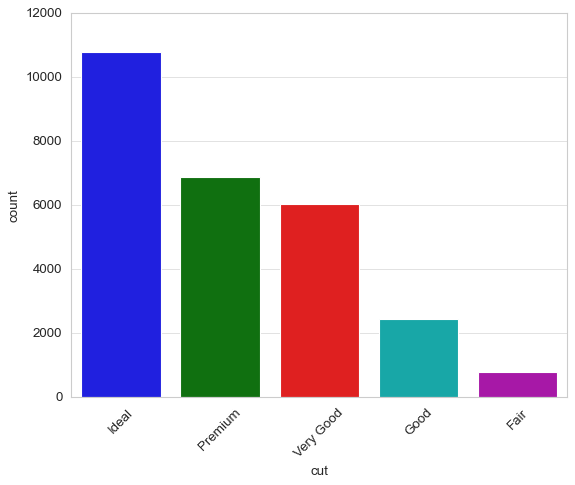

Value Count of color
----------------------------------------------------------------------------
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

Description of color
----------------------------------------------------------------------------
count     26933
unique        7
top           G
freq       5653
Name: color, dtype: object

Countplot of color
----------------------------------------------------------------------------


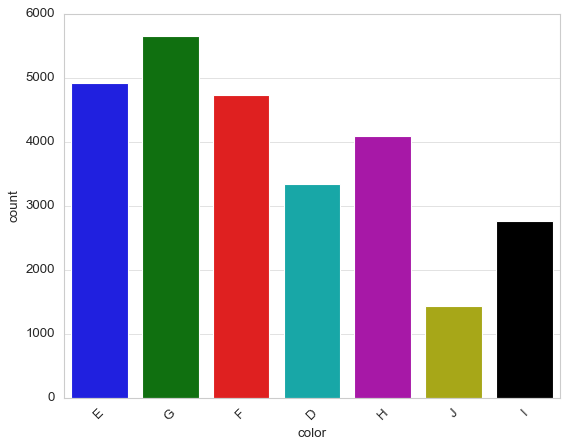

Value Count of clarity
----------------------------------------------------------------------------
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

Description of clarity
----------------------------------------------------------------------------
count     26933
unique        8
top         SI1
freq       6565
Name: clarity, dtype: object

Countplot of clarity
----------------------------------------------------------------------------


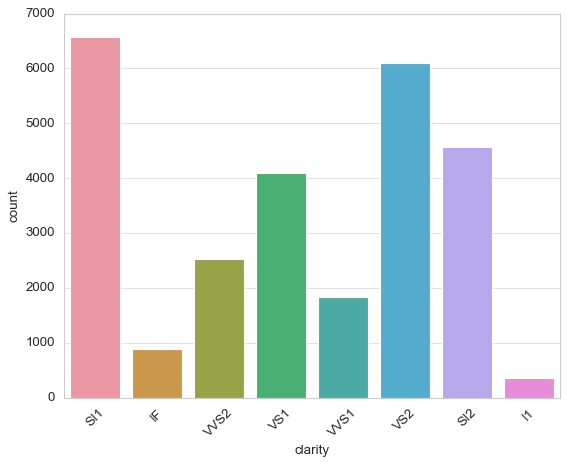

In [18]:
lstobjcolumns1 = list(df_obj.columns.values)
for x in lstobjcolumns1:
    univariateAnalysis_obj1(x)


In [19]:
for columns in df_num.columns:
    print('Skewness of {} is'.format(columns), round(df_num[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df_num[columns].kurt(),2))


Skewness of carat is 1.11
Kurtosis of carat is 1.21
Skewness of depth is -0.03
Kurtosis of depth is 3.68
Skewness of table is 0.77
Kurtosis of table is 1.58
Skewness of x is 0.39
Kurtosis of x is -0.68
Skewness of y is 3.87
Kurtosis of y is 160.04
Skewness of z is 2.58
Kurtosis of z is 87.42
Skewness of price is 1.62
Kurtosis of price is 2.15


                Pairplot


<Figure size 1200x1200 with 0 Axes>

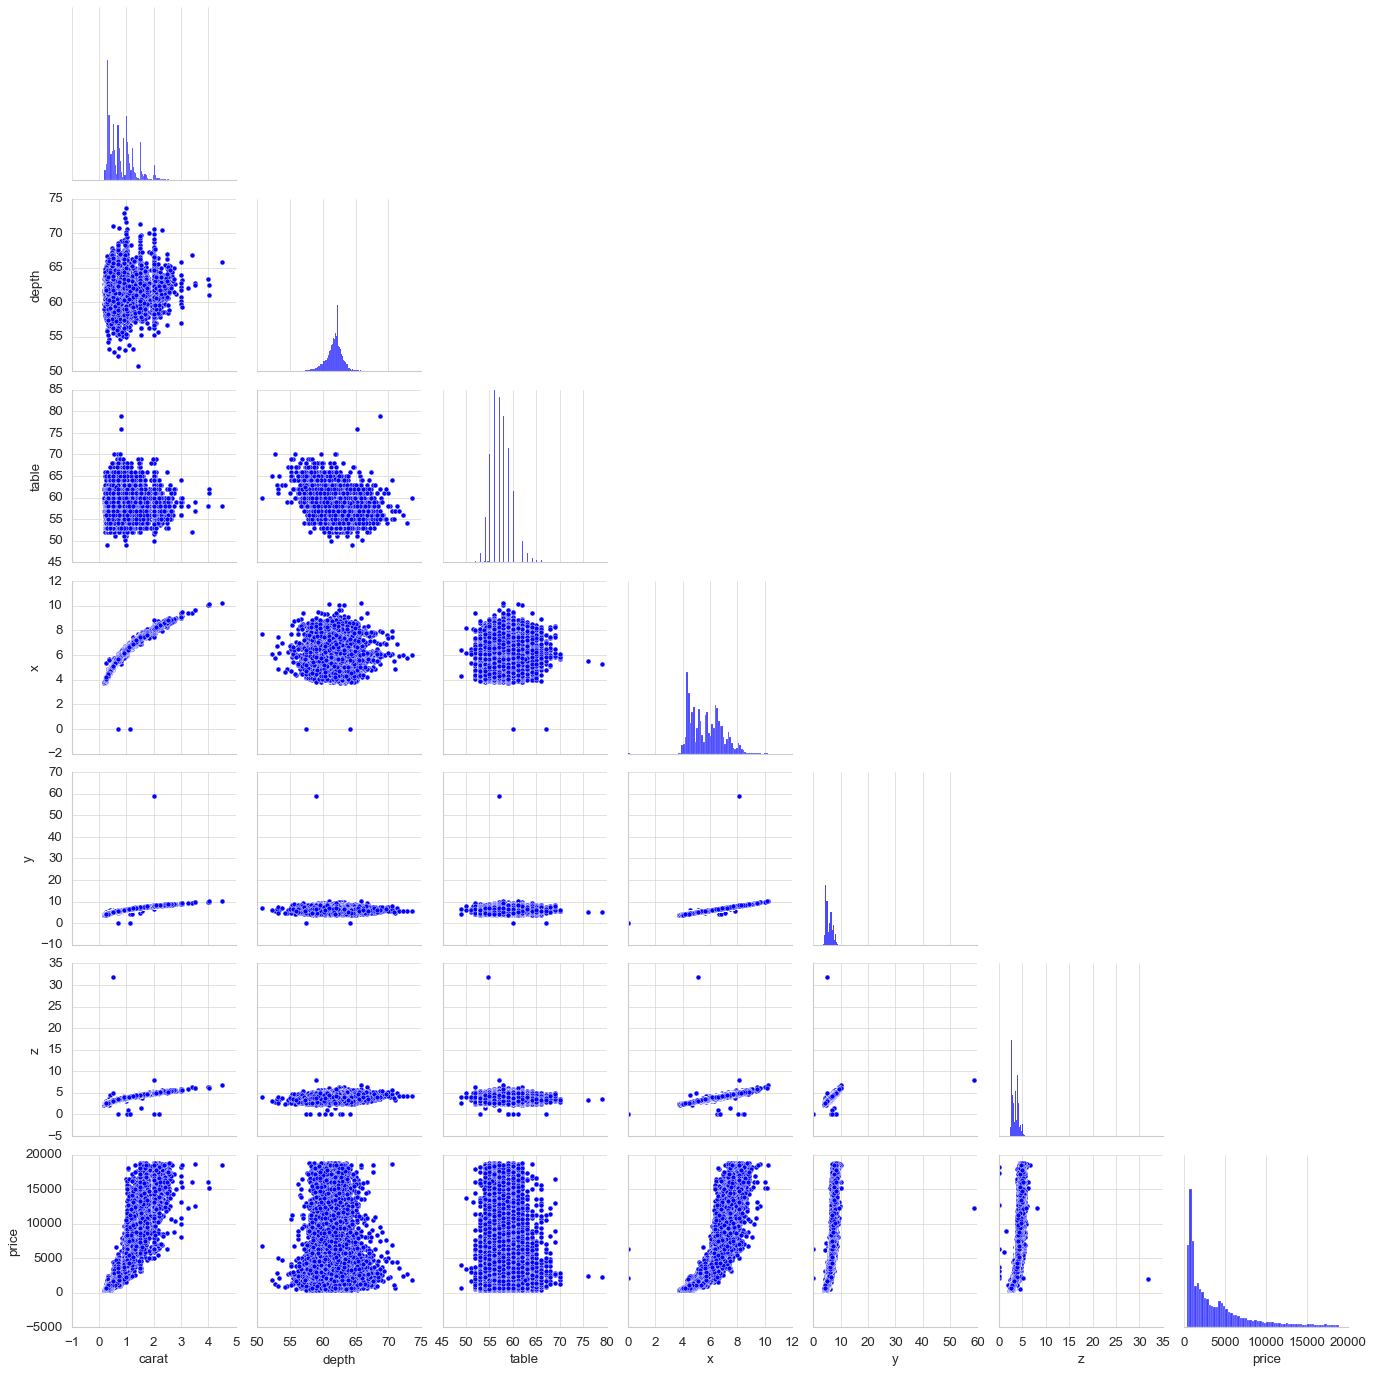

In [20]:
plt.figure(figsize=(15,15));

print('                Pairplot')
sns.pairplot(cub_df,corner=True);
plt.show();

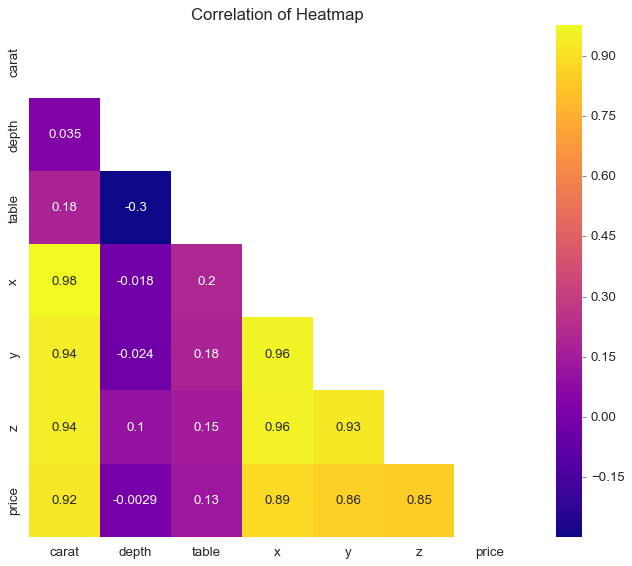

In [21]:
corr=df_num.corr()
mask = np.triu(np.ones_like(corr)) 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,cmap='plasma',mask=mask);
plt.title('Correlation of Heatmap',fontsize=15);


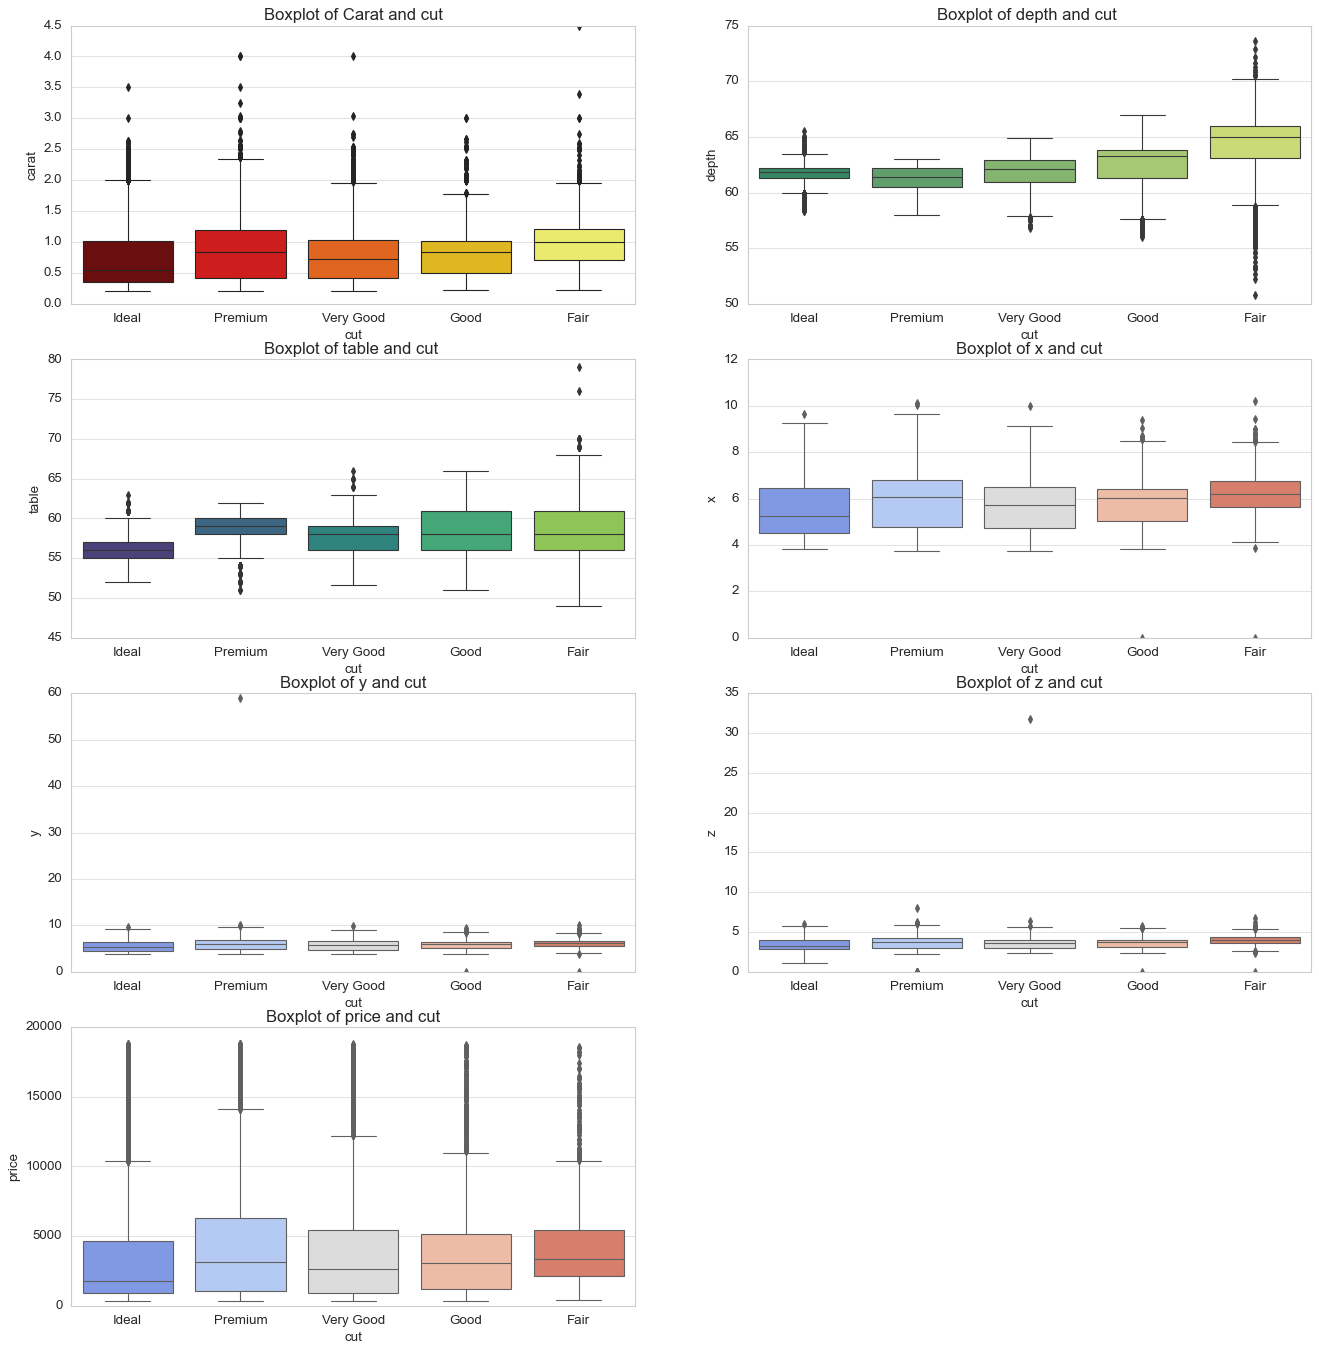

In [22]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.boxplot(y='carat', x='cut', data=cub_df, palette='hot')
plt.title('Boxplot of Carat and cut',fontsize=15)

plt.subplot(4,2,2)
sns.boxplot(y='depth', x='cut', data=cub_df, palette='summer')
plt.title('Boxplot of depth and cut ',fontsize=15)

plt.subplot(4,2,3)
sns.boxplot(y='table', x='cut', data=cub_df, palette='viridis')
plt.title('Boxplot of table and cut ',fontsize=15)

plt.subplot(4,2,4)
sns.boxplot(y='x', x='cut', data=cub_df, palette='coolwarm')
plt.title('Boxplot of x and cut',fontsize=15);

plt.subplot(4,2,5)
sns.boxplot(y='y', x='cut', data=cub_df, palette='coolwarm')
plt.title('Boxplot of y and cut',fontsize=15);

plt.subplot(4,2,6)
sns.boxplot(y='z', x='cut', data=cub_df, palette='coolwarm')
plt.title('Boxplot of z and cut',fontsize=15);

plt.subplot(4,2,7)
sns.boxplot(y='price', x='cut', data=cub_df, palette='coolwarm')
plt.title('Boxplot of price and cut',fontsize=15);



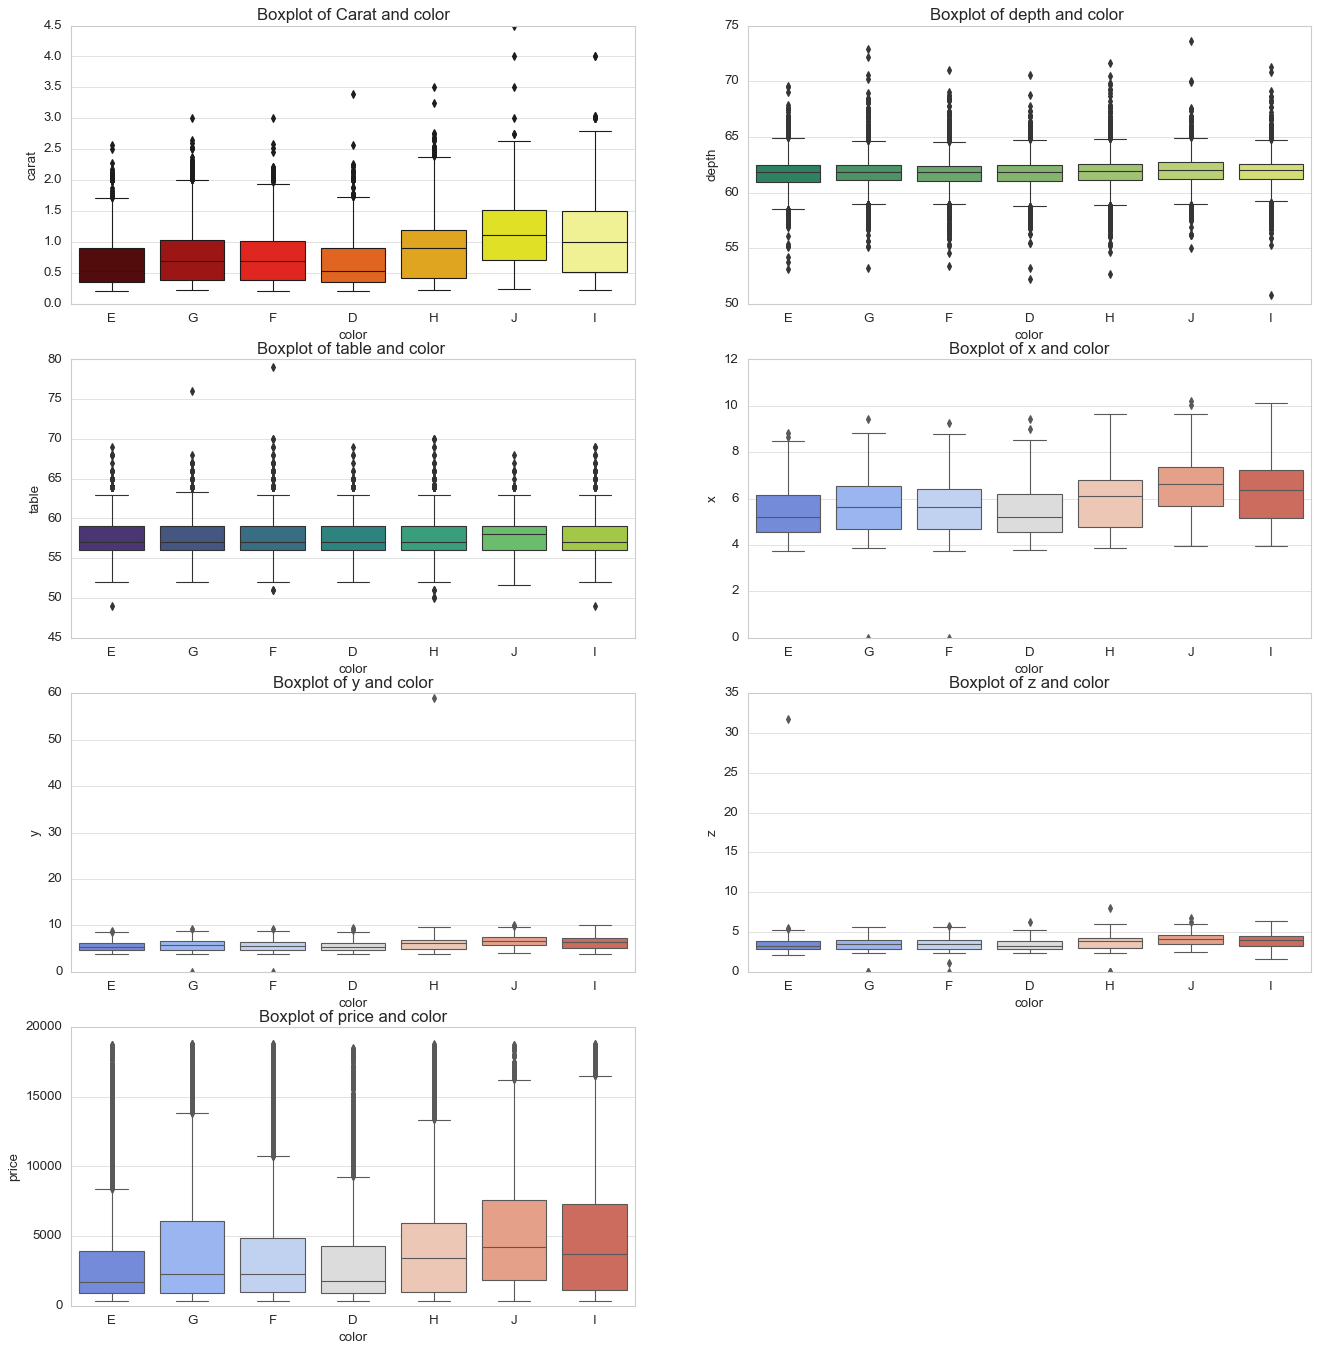

In [23]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.boxplot(y='carat', x='color', data=cub_df, palette='hot')
plt.title('Boxplot of Carat and color',fontsize=15)

plt.subplot(4,2,2)
sns.boxplot(y='depth', x='color', data=cub_df, palette='summer')
plt.title('Boxplot of depth and color ',fontsize=15)

plt.subplot(4,2,3)
sns.boxplot(y='table', x='color', data=cub_df, palette='viridis')
plt.title('Boxplot of table and color ',fontsize=15)

plt.subplot(4,2,4)
sns.boxplot(y='x', x='color', data=cub_df, palette='coolwarm')
plt.title('Boxplot of x and color',fontsize=15);

plt.subplot(4,2,5)
sns.boxplot(y='y', x='color', data=cub_df, palette='coolwarm')
plt.title('Boxplot of y and color',fontsize=15);

plt.subplot(4,2,6)
sns.boxplot(y='z', x='color', data=cub_df, palette='coolwarm')
plt.title('Boxplot of z and color',fontsize=15);

plt.subplot(4,2,7)
sns.boxplot(y='price', x='color', data=cub_df, palette='coolwarm')
plt.title('Boxplot of price and color',fontsize=15);


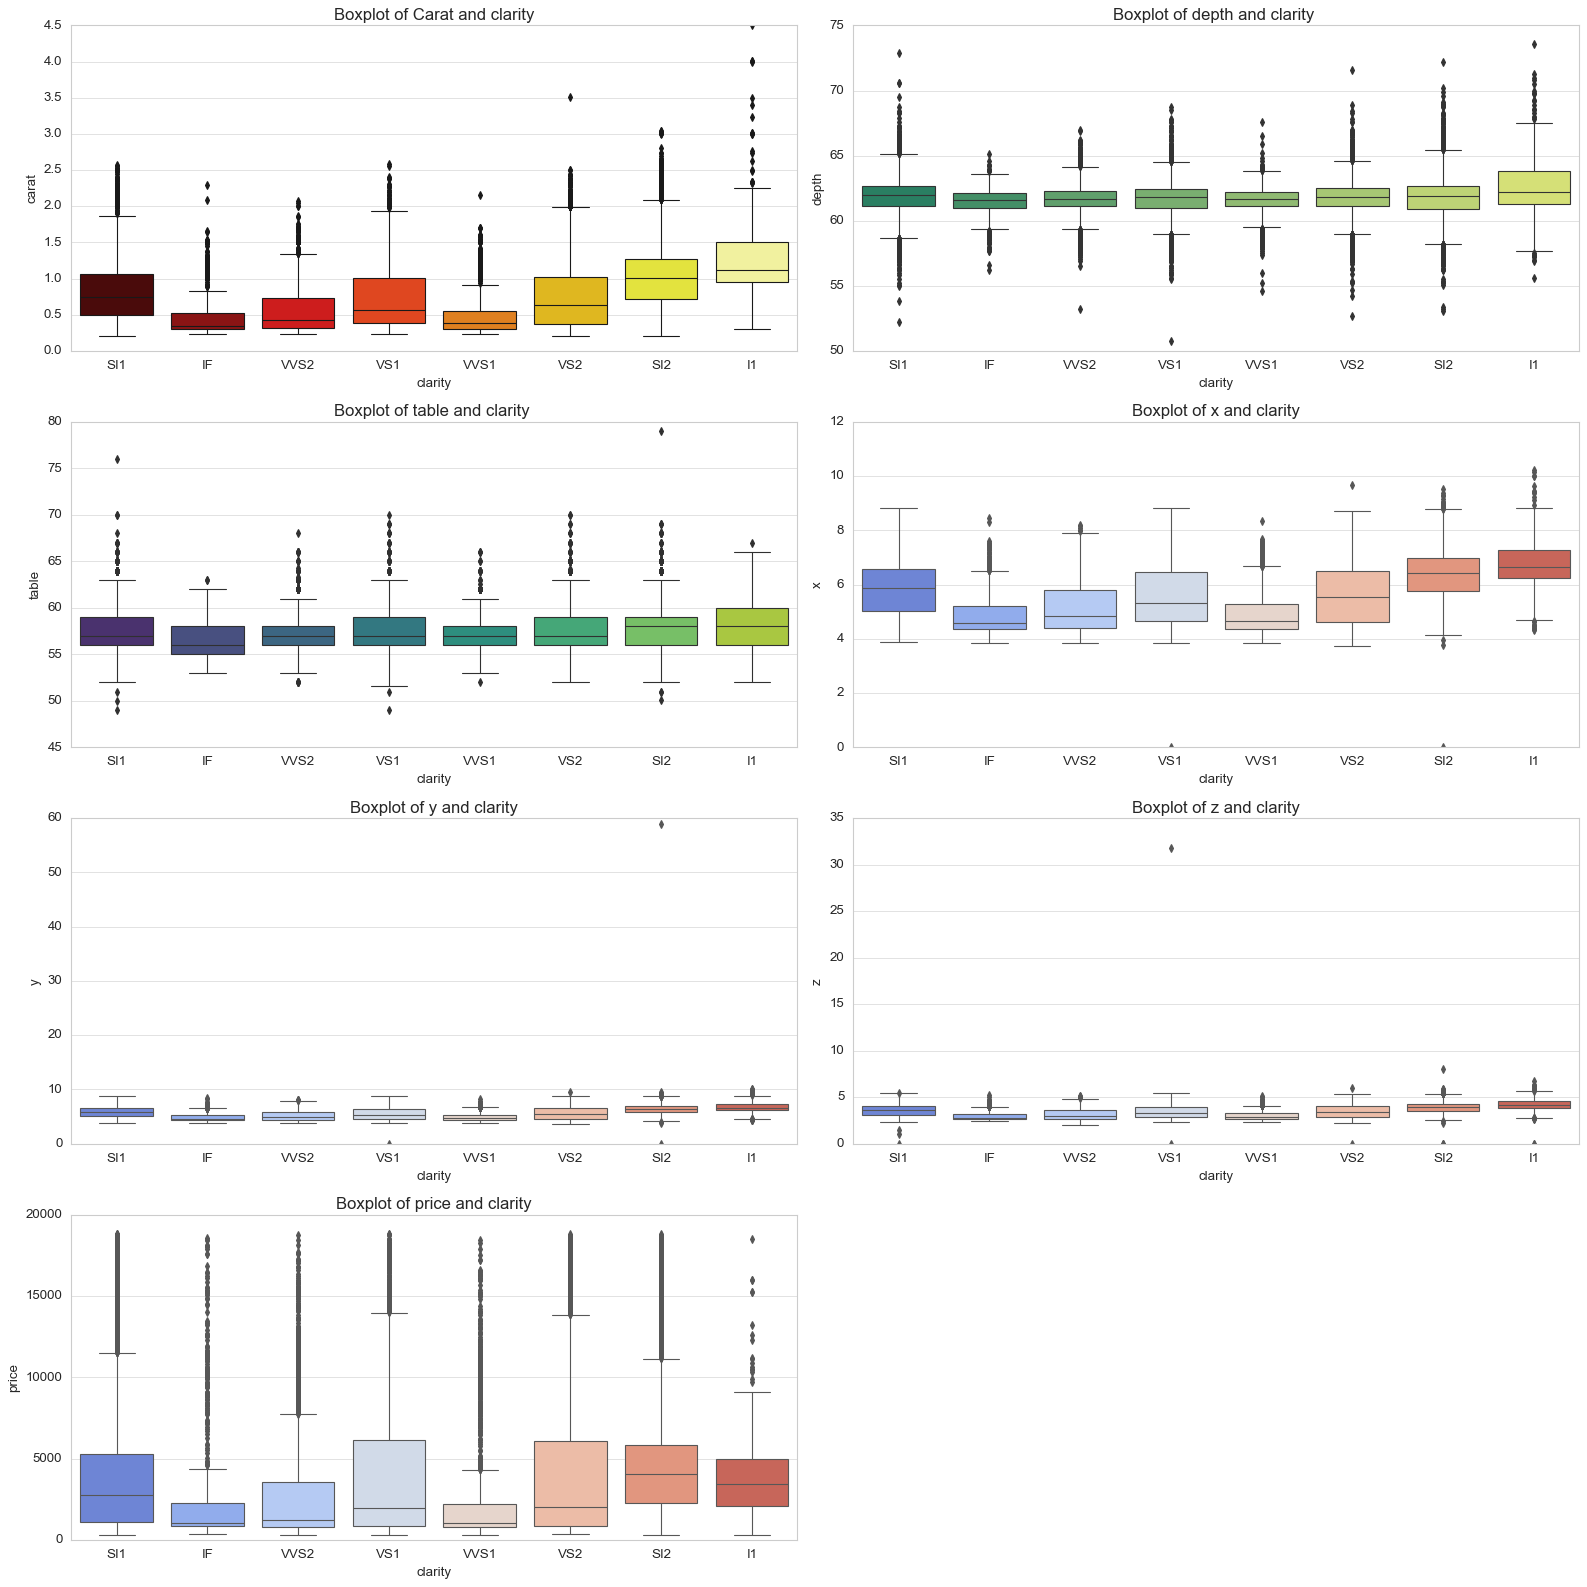

In [24]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.boxplot(y='carat', x='clarity', data=cub_df, palette='hot')
plt.title('Boxplot of Carat and clarity',fontsize=15)

plt.subplot(4,2,2)
sns.boxplot(y='depth', x='clarity', data=cub_df, palette='summer')
plt.title('Boxplot of depth and clarity ',fontsize=15)

plt.subplot(4,2,3)
sns.boxplot(y='table', x='clarity', data=cub_df, palette='viridis')
plt.title('Boxplot of table and clarity ',fontsize=15)

plt.subplot(4,2,4)
sns.boxplot(y='x', x='clarity', data=cub_df, palette='coolwarm')
plt.title('Boxplot of x and clarity',fontsize=15);

plt.subplot(4,2,5)
sns.boxplot(y='y', x='clarity', data=cub_df, palette='coolwarm')
plt.title('Boxplot of y and clarity',fontsize=15);

plt.subplot(4,2,6)
sns.boxplot(y='z', x='clarity', data=cub_df, palette='coolwarm')
plt.title('Boxplot of z and clarity',fontsize=15);

plt.subplot(4,2,7)
sns.boxplot(y='price', x='clarity', data=cub_df, palette='coolwarm')
plt.title('Boxplot of price and clarity',fontsize=15);

plt.tight_layout()


### Multivariate Analysis

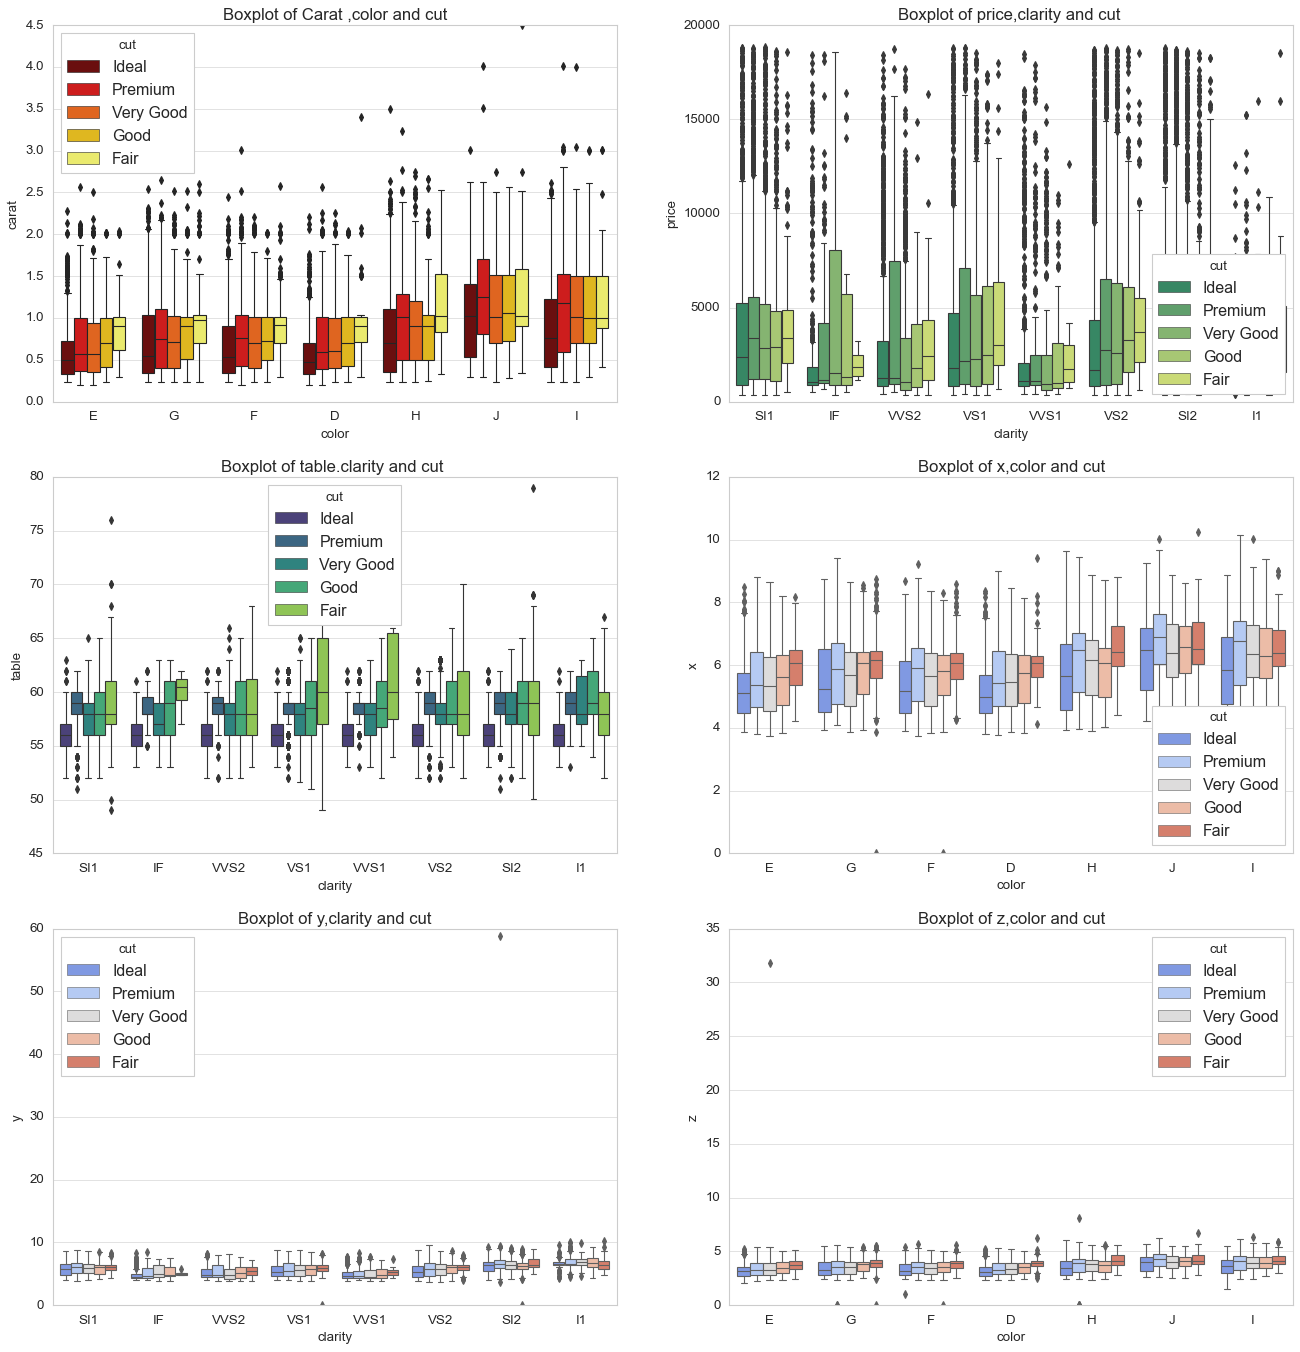

In [25]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(y='carat', x='color', hue='cut', data=cub_df, palette='hot')
plt.title('Boxplot of Carat ,color and cut',fontsize=15)

plt.subplot(3,2,2)
sns.boxplot(y='price', x='clarity',hue='cut', data=cub_df, palette='summer')
plt.title('Boxplot of price,clarity and cut ',fontsize=15)

plt.subplot(3,2,3)
sns.boxplot(y='table', x='clarity',hue='cut', data=cub_df, palette='viridis')
plt.title('Boxplot of table.clarity and cut ',fontsize=15)

plt.subplot(3,2,4)
sns.boxplot(y='x', x='color',hue='cut', data=cub_df, palette='coolwarm')
plt.title('Boxplot of x,color and cut',fontsize=15);

plt.subplot(3,2,5)
sns.boxplot(y='y', x='clarity',hue='cut', data=cub_df, palette='coolwarm')
plt.title('Boxplot of y,clarity and cut',fontsize=15);

plt.subplot(3,2,6)
sns.boxplot(y='z', x='color',hue='cut', data=cub_df, palette='coolwarm')
plt.title('Boxplot of z,color and cut',fontsize=15);



## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.


depth column has null values

In [26]:
cub_df[cub_df['depth'].isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [27]:
cub_df['depth']=cub_df['depth'].fillna(cub_df['depth'].median())
print(cub_df.loc[[26,86,117,148,163]])


     carat        cut color clarity  depth  table     x     y     z  price
26    0.34      Ideal     D     SI1   61.8   57.0  4.50  4.44  2.74    803
86    0.74      Ideal     E     SI2   61.8   59.0  5.92  5.97  3.52   2501
117   1.00    Premium     F     SI1   61.8   59.0  6.40  6.36  4.00   5292
148   1.11    Premium     E     SI2   61.8   61.0  6.66  6.61  4.09   4177
163   1.00  Very Good     F     VS2   61.8   55.0  6.39  6.44  3.99   6340


Above rows are some of the rows with null value which got imputed with a median value of the depth column(less than 5% of data)

Columns 'x','y' and 'z' are the one which has some values as 0 from the describe function


In [28]:
cub_df.loc[(cub_df['x'] == 0) ]


,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [29]:
 cub_df[ (cub_df['y'] == 0) ]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [30]:
 cub_df[ (cub_df['z'] == 0) ]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


x,y and z represents length,width and heighth of the cubic zirconia in mm respectively.Hence its not possible to have 0 as its values. We have to change them by imputing with the median value.

In [31]:
cub_df['x']=cub_df['x'].replace(0,cub_df['x'].median())
cub_df['y']=cub_df['y'].replace(0,cub_df['y'].median())
cub_df['z']=cub_df['z'].replace(0,cub_df['z'].median())


Cut can be re-categorised into Ideal,Premium and Good. Premium and Very Good is combined as Premium. Good and Fair are combined as Good.It is done based on x value.

Clarity can be re-categorised into IF,VVS1,VS1,Sl1 and l1. VVS1 and VVS2  is combined as VVS1. VS1 and VS2 are combined as VS1. Sl1 and Sl2 are combined as Sl1.It is done based on Carat value.

Color can be re-categorised into D, F, H and J. E and F is combined as F. G and H are combined as H. I and J are combined as J.It is done based on Carat value.

In [32]:
df_num1 = cub_df.select_dtypes(include = ['float64','int64'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df_num1.values, ix) for ix in range(df_num1.shape[1])] 
i=0
for column in df_num1.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 112.60408541595991
depth ---> 505.9482255351656
table ---> 500.8486876073657
x ---> 1077.283065551717
y ---> 347.8760665780185
z ---> 373.86986405430247
price ---> 13.536038629355726


## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.


In [33]:
cub_df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [34]:
cub_df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [35]:
cub_df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

### Model 1

## Before Scaling Data LR Model - inital encoding

In [36]:
cub_df2=cub_df.copy()
cut_dict = {'Fair': 0,
            'Good': 1,
            'Very Good': 2,
            'Premium': 3,
            'Ideal':4
           }
cub_df2.cut = cub_df2.cut.map(cut_dict)
cub_df2.cut.astype(str).astype(int)

color_dict = {'D': 0,'E': 1,'F': 2,'G': 3,'H': 4,'I': 5,'J': 6}
cub_df2.color = cub_df2.color.map(color_dict)
cub_df2.color.astype(str).astype(int)

clarity_dict = {'IF': 0,
               'VVS1': 1,
               'VVS2': 2,
               'VS1': 3,
               'VS2': 4,
               'SI1': 5, 
               'SI2': 6, 
               'I1': 7}
               
cub_df2.clarity = cub_df2.clarity.map(clarity_dict)
cub_df2.clarity.astype(str).astype(int)
cub_df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [37]:
cut_dict

{'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

In [38]:
color_dict

{'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [39]:
clarity_dict

{'IF': 0,
 'VVS1': 1,
 'VVS2': 2,
 'VS1': 3,
 'VS2': 4,
 'SI1': 5,
 'SI2': 6,
 'I1': 7}

In [40]:
X = cub_df2.drop('price', axis=1)
y = cub_df2[['price']]



In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


In [42]:
from sklearn.linear_model import LinearRegression

regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)


LinearRegression()

In [43]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))


The coefficient for carat is 11131.971721301814
The coefficient for cut is 107.28987644346527
The coefficient for color is -334.09629862475043
The coefficient for clarity is -504.5027691971778
The coefficient for depth is -82.03515027559568
The coefficient for table is -30.081791696879492
The coefficient for x is -984.3267054058507
The coefficient for y is 10.011040432150162
The coefficient for z is -45.305242609687845


In [44]:
intercept1 = regression_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept1))


The intercept for our model is 10142.448725297465


In [45]:
regression_model1.score(X_train, y_train)


0.9087174183809241

In [46]:
regression_model1.score(X_test, y_test)


0.9080038175630045

### RMSE

In [47]:
mse1train = np.mean((regression_model1.predict(X_train)-y_train)**2)
rmse1train=math.sqrt(mse1train)
rmse1train

1211.3777081621438

In [48]:
mse1test = np.mean((regression_model1.predict(X_test)-y_test)**2)
rmse1test=math.sqrt(mse1test)
rmse1test

1229.2135811232442

### R-squared

In [49]:
y_pred1train = regression_model1.predict(X_train)


In [50]:
from sklearn.metrics import r2_score
r2_1_train=r2_score(y_train, y_pred1train)
r2_1_train

0.9087174183809241

In [51]:
y_pred1test = regression_model1.predict(X_test)


In [52]:
r2_1_test=r2_score(y_test, y_pred1test)
r2_1_test

0.9080038175630045

### Adj R-squared

In [53]:
adj1train=1-(1-r2_score(y_train, y_pred1train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj1train

0.9086738189947026

In [54]:
adj1test=1-(1-r2_score(y_test, y_pred1test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj1test

0.9079012195900265

### Scatterplot

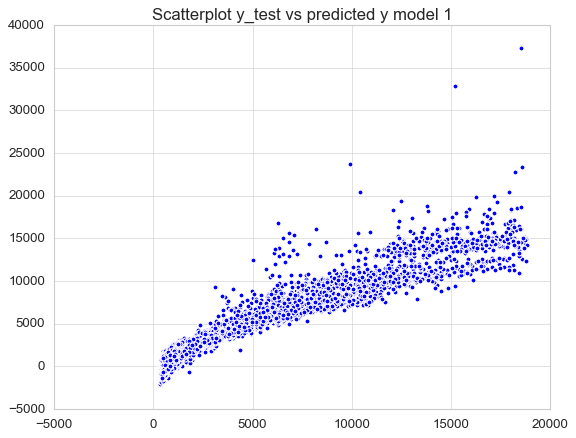

In [55]:
plt.scatter(y_test['price'], y_pred1test)
plt.title('Scatterplot y_test vs predicted y model 1',fontsize=15);


## Scaled Data LR Model

In [56]:
cub_df3=cub_df.copy()

X = cub_df3.drop('price', axis=1)
y = cub_df3[['price']]



In [57]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30 , random_state=1)


In [58]:
from scipy.stats import zscore

dnum_d2 = X_test1.select_dtypes(include=['object'])

num_if1 = X_train1.select_dtypes(include=['int64','float64'])
num_if2 = X_test1.select_dtypes(include=['int64','float64'])


X_train_num_scaled  = num_if1.apply(zscore)
X_test_num_scaled = num_if2.apply(zscore)
### final y scaled
y_train_scaled = y_train1.apply(zscore)
y_test_scaled = y_test1.apply(zscore)


In [59]:
## num_d1 -train

num_d1.cut = num_d1.cut.map(cut_dict)
num_d1.cut.astype(str).astype(int)

num_d1.color = num_d1.color.map(color_dict)
num_d1.color.astype(str).astype(int)

num_d1.clarity = num_d1.clarity.map(clarity_dict)
num_d1.clarity.astype(str).astype(int)

## num_d2 -test
num_d2.cut = num_d2.cut.map(cut_dict)
num_d2.cut.astype(str).astype(int)

num_d2.color = num_d2.color.map(color_dict)
num_d2.color.astype(str).astype(int)

num_d2.clarity = num_d2.clarity.map(clarity_dict)
num_d2.clarity.astype(str).astype(int)

num_d1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 22114 to 235
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cut      18853 non-null  int64
 1   color    18853 non-null  int64
 2   clarity  18853 non-null  int64
dtypes: int64(3)
memory usage: 589.2 KB


In [60]:
num_if1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 22114 to 235
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   18853 non-null  float64
 1   depth   18853 non-null  float64
 2   table   18853 non-null  float64
 3   x       18853 non-null  float64
 4   y       18853 non-null  float64
 5   z       18853 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [61]:
X_train_scaled=pd.concat([X_train_num_scaled, num_d1], axis=1)
X_test_scaled=pd.concat([X_test_num_scaled, num_d2], axis=1)


In [62]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [63]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))


The coefficient for carat is 1.3182187860230576
The coefficient for depth is -0.028279243365211454
The coefficient for table is -0.0167465290282211
The coefficient for x is -0.2755176328169081
The coefficient for y is 0.002945036520086552
The coefficient for z is -0.008180611627740324
The coefficient for cut is 0.02675919995190789
The coefficient for color is -0.08332705707609786
The coefficient for clarity is -0.12582818551713335


In [64]:
intercept2 = regression_model2.intercept_[0]

print("The intercept for our model is {}".format(intercept2))


The intercept for our model is 0.6351729167799093


In [65]:
regression_model2.score(X_train_scaled, y_train_scaled)


0.9087174183809242

In [66]:
regression_model2.score(X_test_scaled, y_test_scaled)


0.9079184793480837

In [67]:
mse2train = np.mean((regression_model2.predict(X_train_scaled)-y_train_scaled)**2)
math.sqrt(mse2train)


0.30213007400633907

pred_scaled_test=regression_model2.predict(X_test_scaled)
pred_noscale_test = scaler.inverse_transform(pred_scaled_test)


In [68]:
mse2test = np.mean((regression_model2.predict(X_test_scaled)-y_test_scaled)**2)
math.sqrt(mse2test)


0.30344937082142104

### Model 2 - initial encoding

## OLS

In [69]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'
expr

'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [70]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,4,4,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,4,1,4,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,4,3,5,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,1,1,6,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,3,2,6,61.1,62.0,6.54,6.49,3.98,4057


In [71]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params


Intercept    10142.448725
carat        11131.971721
cut            107.289876
color         -334.096299
clarity       -504.502769
depth          -82.035150
table          -30.081792
x             -984.326705
y               10.011040
z              -45.305243
dtype: float64

In [72]:
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.084e+04
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:47:43   Log-Likelihood:            -1.6060e+05
No. Observations:               18853   AIC:                         3.212e+05
Df Residuals:                   18843   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.014e+04    710.811     14.269      0.0

### RMSE - Train and Test

In [73]:
MSE_train = np.mean((lm1.predict(X_train)- y_train['price'])**2)
rmse2train=math.sqrt(MSE_train)
rmse2train

1211.3777081621438

In [74]:
MSE_test = np.mean((lm1.predict(X_test)- y_test['price'])**2)
rmse2test=math.sqrt(MSE_test)
rmse2test

1229.2135811232413

### R-squared

In [75]:
r2_2_test=r2_score(y_test, lm1.predict(X_test))
r2_2_test

0.9080038175630047

### Adj R-squared

In [76]:
adj2test=1-(1-r2_score(y_train, lm1.predict(X_train)))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj2test

0.9086738189947028

### Scatterplot

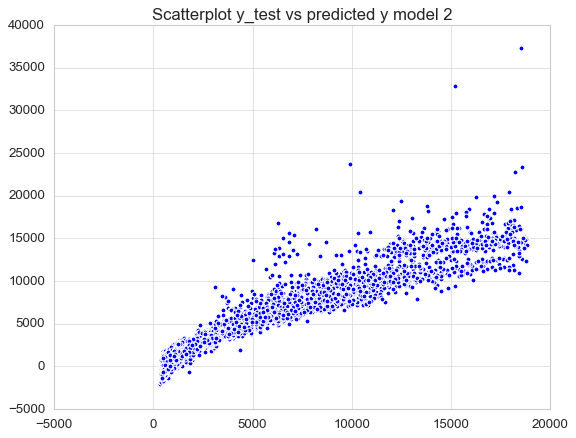

In [77]:
plt.scatter(y_test['price'], lm1.predict(X_test))
plt.title('Scatterplot y_test vs predicted y model 2',fontsize=15);

### Model 3

### Sklearn - combined encoding

In [78]:
cub_df4=cub_df.copy()

cut_dict2 = {'Fair': 0,
            'Good': 0,
            'Very Good': 1,
            'Premium': 1,
            'Ideal':2
           }
color_dict2 = {'D': 0,'E': 1,'F': 1,'G': 2,'H': 2,'I':3,'J': 3}
clarity_dict2 = {'IF': 0,
               'VVS1': 1,
               'VVS2': 1,
               'VS1': 2,
               'VS2': 2,
               'SI1': 3, 
               'SI2': 3, 
               'I1': 4}

cub_df4.cut = cub_df4.cut.map(cut_dict2)
cub_df4.cut.astype(str).astype(int)

cub_df4.color = cub_df4.color.map(color_dict2)
cub_df4.color.astype(str).astype(int)

cub_df4.clarity = cub_df4.clarity.map(clarity_dict2)
cub_df4.clarity.astype(str).astype(int)


0        3
1        0
2        1
3        2
4        1
        ..
26962    3
26963    0
26964    2
26965    1
26966    3
Name: clarity, Length: 26933, dtype: int32

In [79]:
cut_dict2

{'Fair': 0, 'Good': 0, 'Very Good': 1, 'Premium': 1, 'Ideal': 2}

In [80]:
color_dict2

{'D': 0, 'E': 1, 'F': 1, 'G': 2, 'H': 2, 'I': 3, 'J': 3}

In [81]:
clarity_dict2

{'IF': 0,
 'VVS1': 1,
 'VVS2': 1,
 'VS1': 2,
 'VS2': 2,
 'SI1': 3,
 'SI2': 3,
 'I1': 4}

In [82]:
X1 = cub_df4.drop('price', axis=1)
y1 = cub_df4[['price']]

X_train, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)


In [83]:
from sklearn.linear_model import LinearRegression

regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)


LinearRegression()

In [84]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))


The coefficient for carat is 11012.268557051391
The coefficient for cut is 160.09275590511635
The coefficient for color is -561.6644837255302
The coefficient for clarity is -921.0631812094824
The coefficient for depth is -93.0516970843568
The coefficient for table is -32.66871489742376
The coefficient for x is -992.7095778770644
The coefficient for y is 0.9890563225999723
The coefficient for z is -31.37023889306916


In [85]:
intercept1 = regression_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept1))


The intercept for our model is 11273.041552645002


In [86]:
regression_model1.score(X_train, y_train)


0.9025664703645613

In [87]:
regression_model1.score(X_test, y_test)


0.9028374434338761

### RMSE

In [88]:
mse1train = np.mean((regression_model1.predict(X_train)-y_train)**2)
rmse3train=math.sqrt(mse1train)
rmse3train

1251.5258901665827

In [89]:
mse1test = np.mean((regression_model1.predict(X_test)-y_test)**2)
rmse3test=math.sqrt(mse1test)
rmse3test

1263.2575828987135

### R-squared

In [90]:
y_pred1train = regression_model1.predict(X_train)
r2_3_train=r2_score(y_train, y_pred1train)
r2_3_train

0.9025664703645613

In [91]:
y_pred1test = regression_model1.predict(X_test)
r2_3_test=r2_score(y_test, y_pred1test)
r2_3_test

0.9028374434338761

### Adj R-squared

In [92]:
adj3train=1 - (1-regression_model1.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj3train

0.9025199330951923

In [93]:
adj3test=1 - (1-regression_model1.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj3test

0.9027290837053636

### Scatterplot

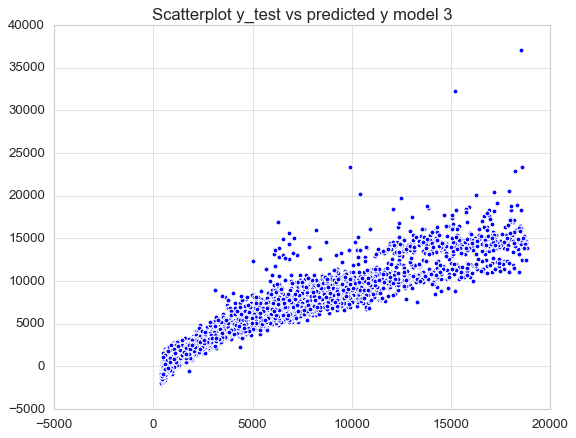

In [94]:
plt.scatter(y_test['price'], y_pred1test)
plt.title('Scatterplot y_test vs predicted y model 3',fontsize=15);

### Model 4

### OLS - combined encoding with Outliers

In [95]:
expr = 'price ~ carat + cut + color + clarity +  table + x + y + z'
expr

'price ~ carat + cut + color + clarity +  table + x + y + z'

In [96]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,1,2,2,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,2,1,2,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,2,2,3,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,0,1,3,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,1,1,3,61.1,62.0,6.54,6.49,3.98,4057


In [97]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params


Intercept     3643.334072
carat        10756.922900
cut            224.764841
color         -566.165431
clarity       -933.620180
table           -7.854375
x             -812.865445
y               22.185758
z             -183.380552
dtype: float64

In [98]:
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.165e+04
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:47:45   Log-Likelihood:            -1.6128e+05
No. Observations:               18853   AIC:                         3.226e+05
Df Residuals:                   18844   BIC:                         3.226e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3643.3341    319.317     11.410      0.0

In [99]:
MSE_train = np.mean((lm1.predict(X_train)- y_train['price'])**2)
rmse4train=math.sqrt(MSE_train)
rmse4train

1255.9575508945982

In [100]:
MSE_test = np.mean((lm1.predict(X_test)- y_test['price'])**2)
rmse4test=math.sqrt(MSE_test)
rmse4test

1268.2762022065328

### R-squared Test

In [101]:
r2_4_test=r2_score(y_test, lm1.predict(X_test))
r2_4_test

0.9020639028806737

### Adj R-squared Test


In [102]:
adj4test=1-(1-r2_score(y_test, lm1.predict(X_test)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj4test

0.9019546804675295

### Scatterplot

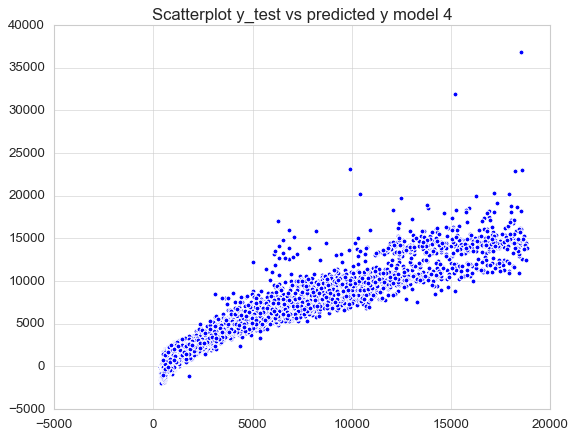

In [103]:
plt.scatter(y_test['price'], lm1.predict(X_test))
plt.title('Scatterplot y_test vs predicted y model 4',fontsize=15);

### Model 5 - Sklearn LR without Outliers - initial encoding

In [104]:
cub_df_noOutl=cub_df.copy()
cub_df_noOutl_num = cub_df_noOutl.select_dtypes(include = ['int64','float64'])

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [105]:
for column in cub_df_noOutl_num.columns:
    lr,ur=remove_outlier(cub_df_noOutl[column])
    cub_df_noOutl[column]=np.where(cub_df_noOutl[column]>ur,ur,cub_df_noOutl[column])
    cub_df_noOutl[column]=np.where(cub_df_noOutl[column]<lr,lr,cub_df_noOutl[column])



In [106]:
cub_df_noOutl.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

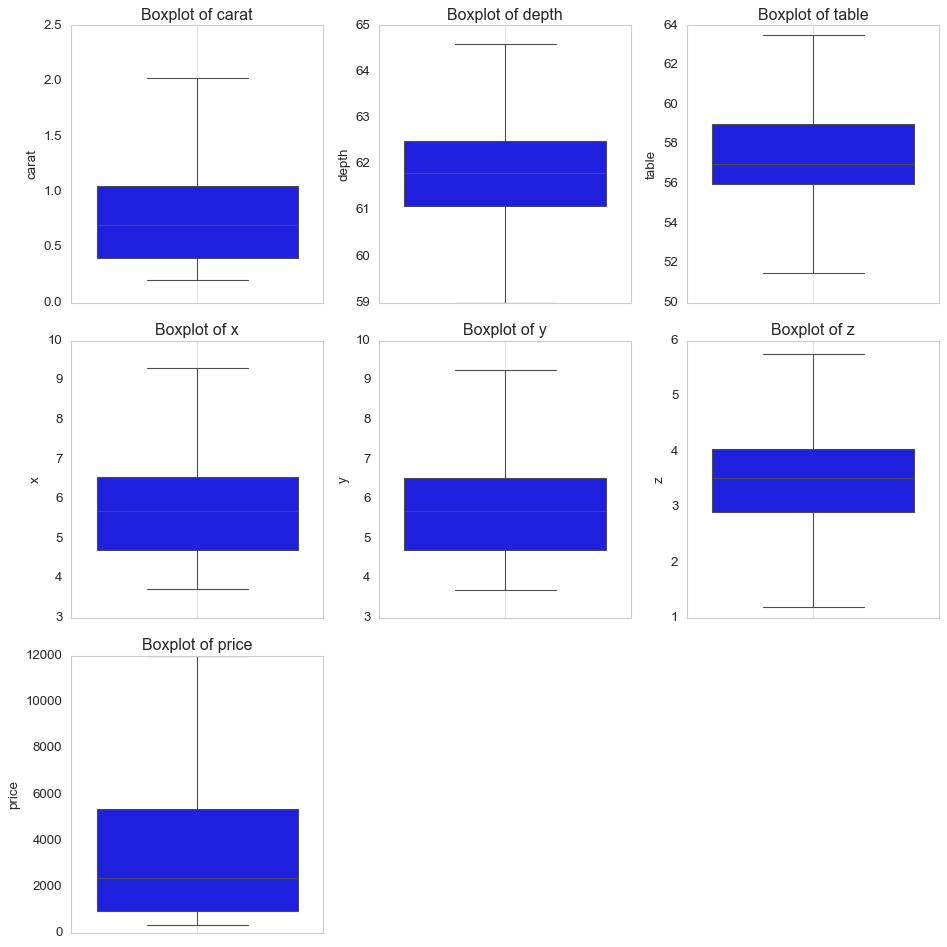

In [107]:
cub_df_noOutl_num2 = cub_df_noOutl.select_dtypes(include = ['int64','float64'])

fig=plt.figure(figsize=(12,12))
for i in range(0,len(cub_df_noOutl_num2.columns)):
    fig.add_subplot(3,3,i+1)
    sns.boxplot(y=cub_df_noOutl_num2[cub_df_noOutl_num2.columns[i]])
    plt.title('Boxplot of {}'.format(cub_df_noOutl_num2.columns[i]))

    #ax.set_title('Boxplot of '+holid_df_num.columns[i],color='Red')
    plt.grid()

plt.tight_layout()


In [108]:
cub_df_noOutl.cut = cub_df_noOutl.cut.map(cut_dict)
cub_df_noOutl.cut.astype(str).astype(int)

cub_df_noOutl.color = cub_df_noOutl.color.map(color_dict)
cub_df_noOutl.color.astype(str).astype(int)

cub_df_noOutl.clarity = cub_df_noOutl.clarity.map(clarity_dict)
cub_df_noOutl.clarity.astype(str).astype(int)


0        5
1        0
2        2
3        3
4        1
        ..
26962    5
26963    0
26964    4
26965    2
26966    5
Name: clarity, Length: 26933, dtype: int32

In [109]:
X1 = cub_df_noOutl.drop('price', axis=1)
y1 = cub_df_noOutl[['price']]

X_train, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)


In [110]:
from sklearn.linear_model import LinearRegression

regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)


LinearRegression()

In [111]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))


The coefficient for carat is 13713.21426177974
The coefficient for cut is 133.3457039610511
The coefficient for color is -333.8268465840487
The coefficient for clarity is -483.911960800029
The coefficient for depth is 3.9239010421218254
The coefficient for table is -28.035878741661772
The coefficient for x is -2347.4235932445317
The coefficient for y is 1544.5033054305238
The coefficient for z is -1819.3683369303121


In [112]:
intercept1 = regression_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept1))


The intercept for our model is 7854.618473168935


In [113]:
regression_model1.score(X_train, y_train)


0.9165051703009585

In [114]:
regression_model1.score(X_test, y_test)


0.896867478747077

### RMSE

In [115]:
mse1train = np.mean((regression_model1.predict(X_train)-y_train)**2)
rmse5train=math.sqrt(mse1train)
rmse5train

1158.5516819397058

In [116]:
mse1test = np.mean((regression_model1.predict(X_test)-y_test)**2)
rmse5test=math.sqrt(mse1test)
rmse5test

1115.6454874564984

### R-squared

In [117]:
y_pred1train = regression_model1.predict(X_train)
r2_5_train=r2_score(y_train, y_pred1train)
r2_5_train

0.9165051703009585

In [118]:
y_pred1test = regression_model1.predict(X_test)
r2_5_test=r2_score(y_test, y_pred1test)
r2_5_test

0.896867478747077

### Adj R-squared

In [119]:
adj5train=1-(1-r2_score(y_train, y_pred1train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj5train

0.9164652905860886

In [120]:
adj5test=1-(1-r2_score(y_test, y_pred1test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj5test

0.8967524610653822

### Scatterplot

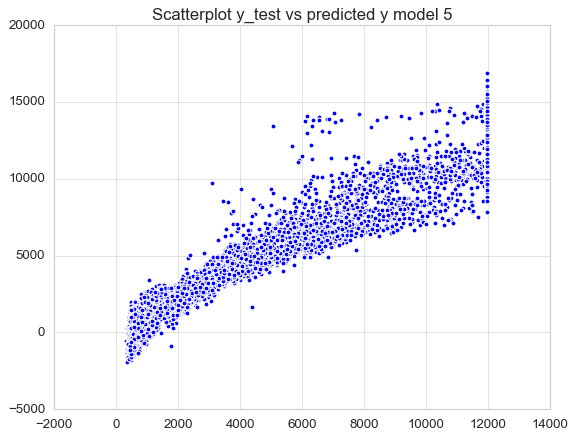

In [121]:
plt.scatter(y_test['price'], y_pred1test)
plt.title('Scatterplot y_test vs predicted y model 5',fontsize=15);

### Model 6 - OLS without Outliers-initial encoding

In [122]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'
expr

'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [123]:
X1 = cub_df_noOutl.drop('price', axis=1)
y1 = cub_df_noOutl[['price']]

X_train, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)


In [124]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,4,4,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,4,1,4,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,4,3,5,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,1,1,6,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,3,2,6,61.1,62.0,6.54,6.49,3.98,4057


In [125]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params


Intercept     7854.618473
carat        13713.214262
cut            133.345704
color         -333.826847
clarity       -483.911961
depth            3.923901
table          -28.035879
x            -2347.423593
y             1544.503305
z            -1819.368337
dtype: float64

In [126]:
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.298e+04
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:47:48   Log-Likelihood:            -1.5976e+05
No. Observations:               18853   AIC:                         3.195e+05
Df Residuals:                   18843   BIC:                         3.196e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7854.6185   1012.808      7.755      0.0

### RMSE

In [127]:
MSE_train = np.mean((lm1.predict(X_train)- y_train['price'])**2)
rmse6train=math.sqrt(MSE_train)
rmse6train

1158.551681939704

In [128]:
MSE_test = np.mean((lm1.predict(X_test)- y_test['price'])**2)
rmse6test=math.sqrt(MSE_test)
rmse6test

1115.6454874564613

### R-squared - Test

In [129]:
r2_6_test=r2_score(y_test, lm1.predict(X_test))
r2_6_test

0.8968674787470838

### Adj R-squared -Test

In [130]:
adj6test=1-(1-r2_score(y_test, lm1.predict(X_test)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj6test

0.8967524610653892

### Scatterplot

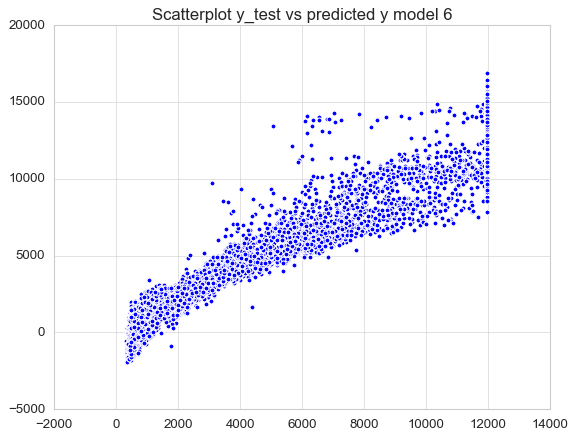

In [131]:
plt.scatter(y_test['price'], lm1.predict(X_test))
plt.title('Scatterplot y_test vs predicted y model 6',fontsize=15);

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.


In [132]:
index=['RMSE', 'R-squared', 'Adj R-squared']
data = pd.DataFrame({'Model 1 Train':[rmse1train,r2_1_train,adj1train],
        'Model 1 Test':[rmse1test,r2_1_test,adj1test],
       'Model 2 Train':[rmse2train,0.909,0.909],
        'Model 2 Test':[rmse2test,r2_2_test,adj2test],
       'Model 3 Train':[rmse3train,r2_3_train,adj3train],
        'Model 3 Test':[rmse3test,r2_3_test,adj3test],
        'Model 4 Train':[rmse4train,0.902,0.902],
        'Model 4 Test':[rmse4test,r2_4_test,adj4test],
        'Model 5 Train':[rmse5train,r2_5_train,adj5train],
        'Model 5 Test':[rmse5test,r2_5_test,adj5test],
        'Model 6 Train':[rmse6train,0.917,0.916],
        'Model 6 Test':[rmse6test,r2_6_test,adj6test]},index=index)
round(data,3)


,Model 1 Train,Model 1 Test,Model 2 Train,Model 2 Test,Model 3 Train,Model 3 Test,Model 4 Train,Model 4 Test,Model 5 Train,Model 5 Test,Model 6 Train,Model 6 Test
RMSE,1211.378,1229.214,1211.378,1229.214,1251.526,1263.258,1255.958,1268.276,1158.552,1115.645,1158.552,1115.645
R-squared,0.909,0.908,0.909,0.908,0.903,0.903,0.902,0.902,0.917,0.897,0.917,0.897
Adj R-squared,0.909,0.908,0.909,0.909,0.903,0.903,0.902,0.902,0.916,0.897,0.916,0.897


Both the sklearn and ols models are giving better results after treating the outliers. Hence Model 5 and 6 are the most optimised.R-squared 92.00% shows a good accuracy which means 92% of the price is explained by the model.


### Business Insights and Recommendations

Increase in carat weight of the diamond will increase the price of the diamond considerably.

Width of the diamond in mm also plays an important factor. As the width increases the price also increases. Length and height has the effect on price.

Brighter the color of the diamond, the price increases.

Gem Stones Ltd can collect more data which helps in building better models for price prediction.

Most of the cubic zirconia with Very Good cut ,clarity VVS2 has a higher price range. For getting a high profit share the company can concentrate on these factors

The 5 most important attributes are carat,length,width,color and clarity.

# Problem 2:  Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.



In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.


In [134]:
holid_df=pd.read_csv('Holiday_Package.csv')
holid_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [135]:
holid_df.drop('Unnamed: 0',axis=1,inplace=True)

In [136]:
holid_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [137]:
holid_df.shape

(872, 7)

In [138]:
holid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


There are 872 entries with 7 columns of which Holiday_Package is a target variable. There are 872 entries non-null values for all columns which means there are no missing values 

In [139]:
holid_df.describe(include='all')


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


We can see that 75% of the data in no_young_children are 0s. There are 2 categories of foreign and holiday package with most frequent values as no.

In [140]:
holid_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [141]:
holid_df.duplicated().sum()


0

### Univariate Analysis

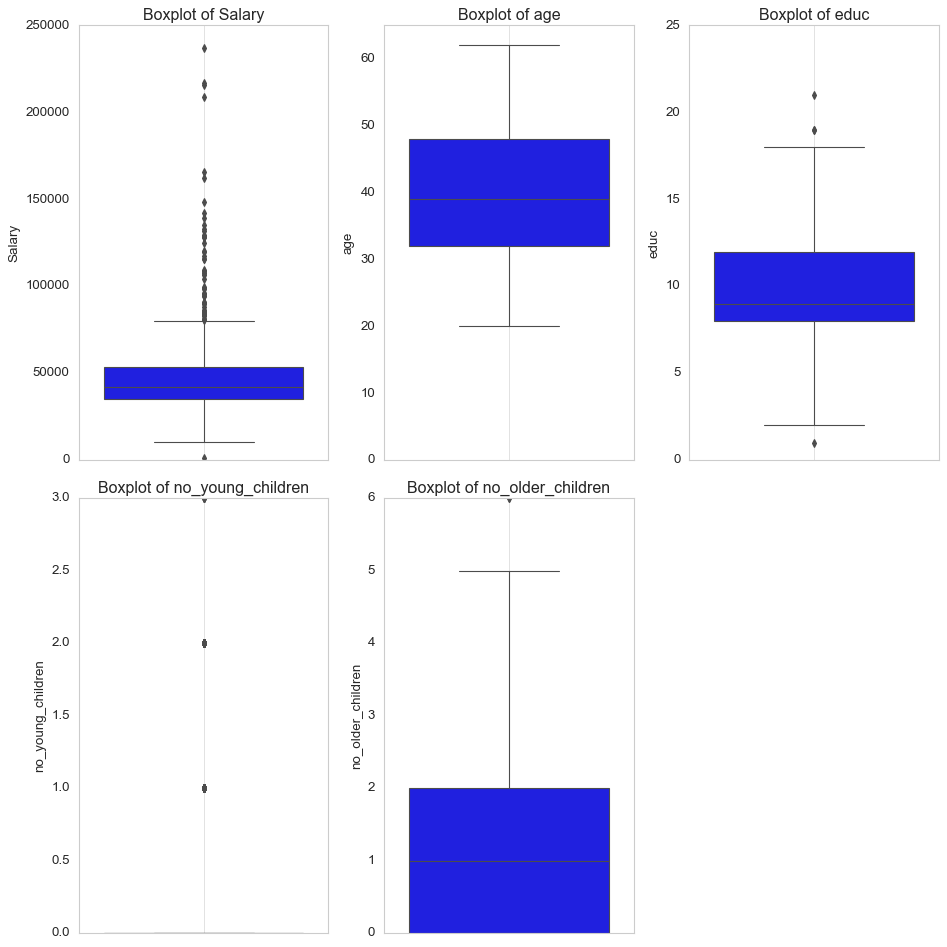

In [142]:
holid_df_num = holid_df.select_dtypes(include = ['int64'])

fig=plt.figure(figsize=(12,12))
for i in range(0,len(holid_df_num.columns)):
    ax=fig.add_subplot(2,3,i+1)
    g=sns.boxplot(y=holid_df_num[holid_df_num.columns[i]])
    if holid_df_num.columns[i]=='age':
        g.set_ylim((0,65))
    plt.title('Boxplot of {}'.format(holid_df_num.columns[i]))

    #ax.set_title('Boxplot of '+holid_df_num.columns[i],color='Red')
    plt.grid()

plt.tight_layout()


In [143]:
holid_df_num.no_older_children.value_counts()


0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [144]:
from scipy import stats

def proportion_outlier2(column):
    Q1=holid_df_num[column].quantile(q=0.25)
    Q3=holid_df_num[column].quantile(q=0.75)
    IQR=stats.iqr(holid_df_num[column])   
    
    L_outlier=Q1-1.5*(Q3-Q1)
    U_outlier=Q3+1.5*(Q3-Q1)
    print('Lower outliers in ' +column+ ' is : ', L_outlier)
    print('Upper outliers in ' +column+ ' is : ', U_outlier)
    print('Number of outliers in '+column + ' upper : ', holid_df_num[holid_df_num[column]>U_outlier][column].count())
    print('Number of outliers in '+column + ' lower : ', holid_df_num[holid_df_num[column]<L_outlier][column].count())
    print('% of Outlier in '+column + ' upper: ',round(holid_df_num[holid_df_num[column]>U_outlier][column].count()*100/len(holid_df_num)), '%')
    print('% of Outlier in '+column + ' lower: ',round(holid_df_num[holid_df_num[column]<L_outlier][column].count()*100/len(holid_df_num)), '%')
    print('-----------------------------------------------------')

lstnumericcolumns2 = list(holid_df_num.columns.values)

for x in lstnumericcolumns2:
    proportion_outlier2(x)


Lower outliers in Salary is :  8105.75
Upper outliers in Salary is :  80687.75
Number of outliers in Salary upper :  56
Number of outliers in Salary lower :  1
% of Outlier in Salary upper:  6 %
% of Outlier in Salary lower:  0 %
-----------------------------------------------------
Lower outliers in age is :  8.0
Upper outliers in age is :  72.0
Number of outliers in age upper :  0
Number of outliers in age lower :  0
% of Outlier in age upper:  0 %
% of Outlier in age lower:  0 %
-----------------------------------------------------
Lower outliers in educ is :  2.0
Upper outliers in educ is :  18.0
Number of outliers in educ upper :  3
Number of outliers in educ lower :  1
% of Outlier in educ upper:  0 %
% of Outlier in educ lower:  0 %
-----------------------------------------------------
Lower outliers in no_young_children is :  0.0
Upper outliers in no_young_children is :  0.0
Number of outliers in no_young_children upper :  207
Number of outliers in no_young_children lower :  0


Value Count of no_young_children
----------------------------------------------------------------------------
0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64

Countplot of no_young_children
----------------------------------------------------------------------------


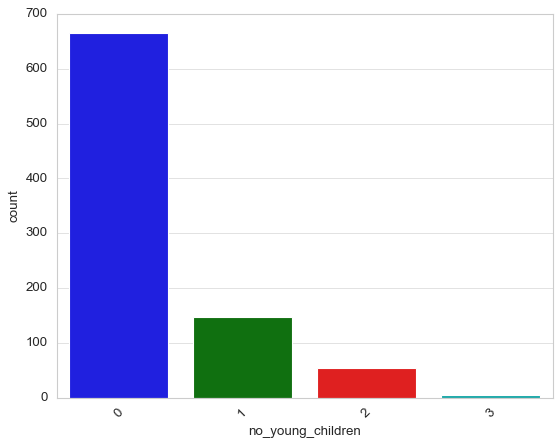

Value Count of no_older_children
----------------------------------------------------------------------------
0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64

Countplot of no_older_children
----------------------------------------------------------------------------


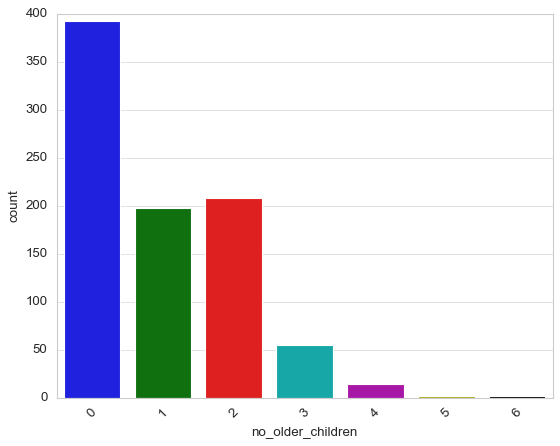

Value Count of foreign
----------------------------------------------------------------------------
no     656
yes    216
Name: foreign, dtype: int64

Description of foreign
----------------------------------------------------------------------------
count     872
unique      2
top        no
freq      656
Name: foreign, dtype: object

Countplot of foreign
----------------------------------------------------------------------------


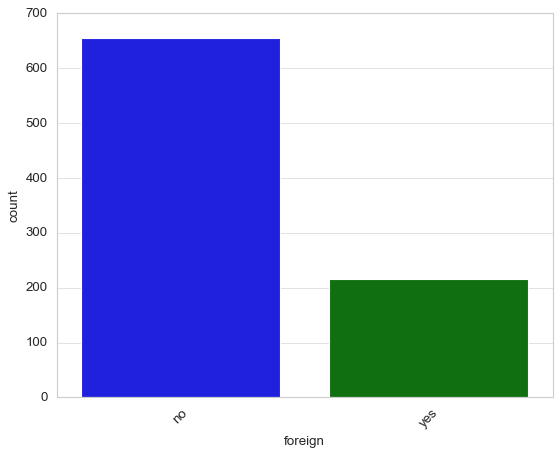

Value Count of Holliday_Package
----------------------------------------------------------------------------
no     471
yes    401
Name: Holliday_Package, dtype: int64

Description of Holliday_Package
----------------------------------------------------------------------------
count     872
unique      2
top        no
freq      471
Name: Holliday_Package, dtype: object

Countplot of Holliday_Package
----------------------------------------------------------------------------


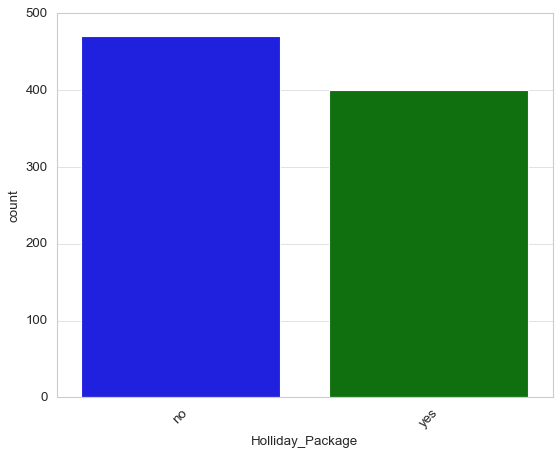

In [145]:
from scipy import stats
cols = ['no_young_children','no_older_children','foreign','Holliday_Package']

holid_df_obj = holid_df.select_dtypes(include = ['object'])



def univariateAnalysis_obj2(column):
    print("Value Count of " + column)
    print("----------------------------------------------------------------------------")
    print(holid_df[column].value_counts(),end='\n\n')

    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(holid_df[column].describe(),end='\n\n')
    
    
    plt.figure()
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=holid_df[column]);
    plt.xticks(rotation=45)
    
    
    plt.show()
lstcolumns2 = list(cols)
for x in lstcolumns2:
    univariateAnalysis_obj2(x)


Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64

Interquartile range (IQR) of is  18145.5
Range of values:  235639 

Distribution of Salary
----------------------------------------------------------------------------


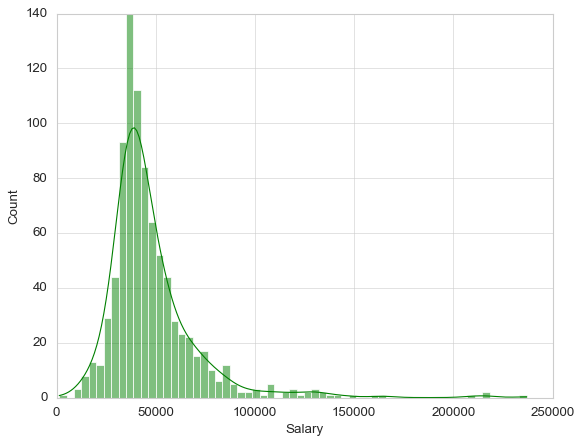

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64

Interquartile range (IQR) of is  16.0
Range of values:  42 

Distribution of age
----------------------------------------------------------------------------


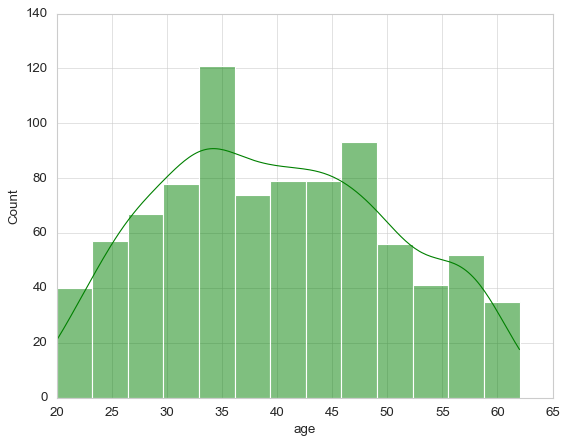

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64

Interquartile range (IQR) of is  4.0
Range of values:  20 

Distribution of educ
----------------------------------------------------------------------------


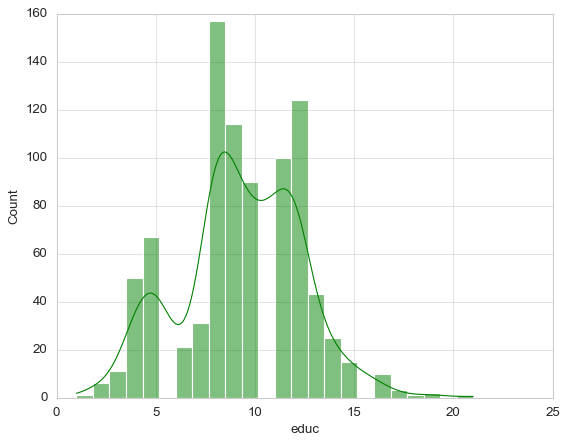

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64

Interquartile range (IQR) of is  0.0
Range of values:  3 

Distribution of no_young_children
----------------------------------------------------------------------------


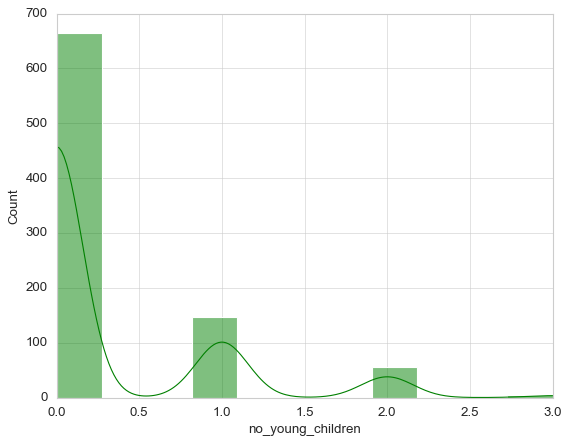

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64

Interquartile range (IQR) of is  2.0
Range of values:  6 

Distribution of no_older_children
----------------------------------------------------------------------------


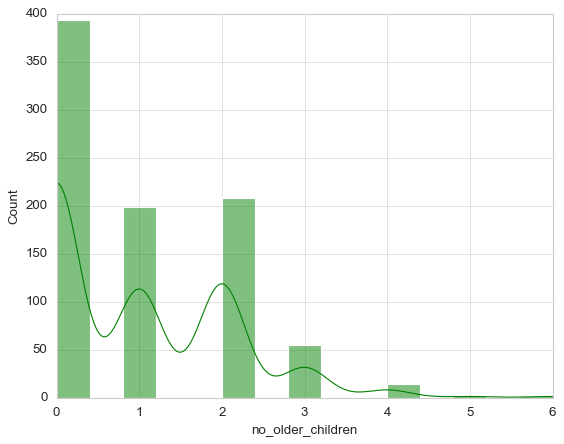

In [146]:
def univariateAnalysis_numeric2(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(holid_df[column].describe(),end='\n\n')
    print('Interquartile range (IQR) of is ', round(stats.iqr(holid_df[column]),3))
    print('Range of values: ', round(holid_df[column].max()-holid_df[column].min(),3),"\n")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(holid_df[column], kde=True, color='g');
    plt.show()

lstnumericcolumns2 = list(holid_df_num.columns.values)
for x in lstnumericcolumns2:
    univariateAnalysis_numeric2(x)


In [147]:
for columns in holid_df_num.columns:
    print('Skewness of {} is'.format(columns), round(holid_df_num[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(holid_df_num[columns].kurt(),2))


Skewness of Salary is 3.1
Kurtosis of Salary is 15.85
Skewness of age is 0.15
Kurtosis of age is -0.91
Skewness of educ is -0.05
Kurtosis of educ is 0.01
Skewness of no_young_children is 1.95
Kurtosis of no_young_children is 3.11
Skewness of no_older_children is 0.95
Kurtosis of no_older_children is 0.68


### Bivariate Analysis with Holiday_Package 

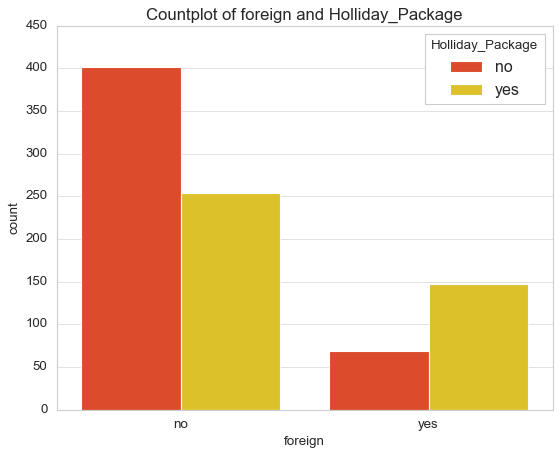

In [148]:
sns.countplot(x=holid_df["foreign"],hue=holid_df["Holliday_Package"],palette=['#F9380E',"#F9D50E"]); 
plt.title('Countplot of foreign and Holliday_Package',fontsize=15);


Non-foreigners opt the holiday package more than the foreigners

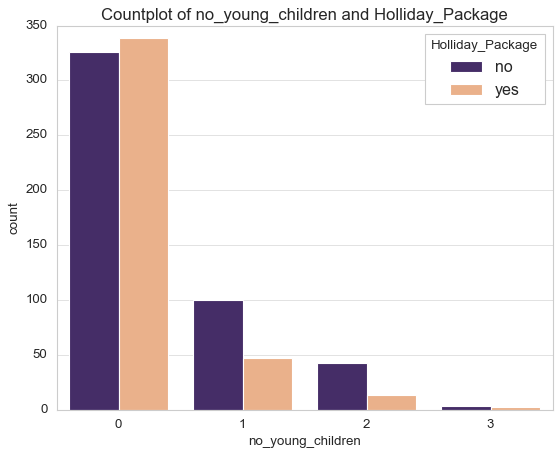

In [149]:
sns.countplot(x=holid_df["no_young_children"],hue=holid_df["Holliday_Package"],palette=['#432371',"#FAAE7B"]); 
plt.title('Countplot of no_young_children and Holliday_Package',fontsize=15);


People with no younger children are willing to opt for the package than the people with younger children

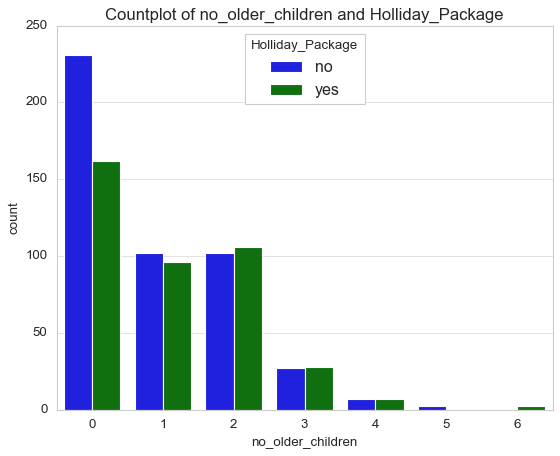

In [150]:
sns.countplot(x=holid_df["no_older_children"],hue=holid_df["Holliday_Package"]); 
plt.title('Countplot of no_older_children and Holliday_Package',fontsize=15);


People with 2,3 or 4 older children are willing to opt package than not to. 

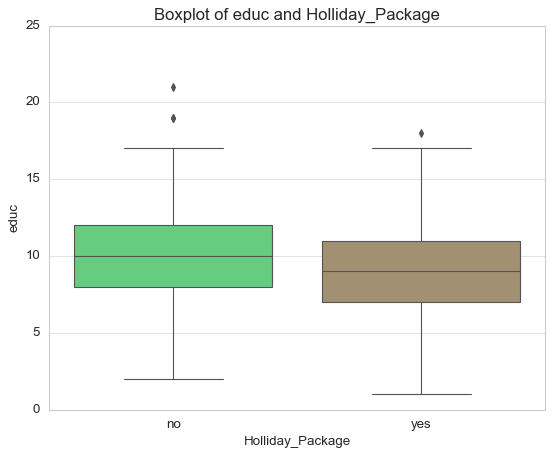

In [151]:
sns.boxplot(y='educ', x='Holliday_Package', data=holid_df, palette='terrain')
plt.title('Boxplot of educ and Holliday_Package',fontsize=15);


Years of formal education doesn’t have too much effect on the decision of opting the holiday package as the median value is nearly the same for both category.

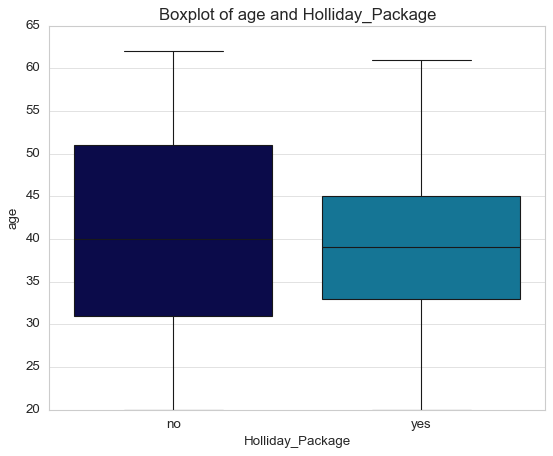

In [152]:
sns.boxplot(y='age', x='Holliday_Package', data=holid_df, palette='ocean')
plt.title('Boxplot of age and Holliday_Package',fontsize=15);


In [153]:
holid_df[(holid_df.age > 45)]['Holliday_Package'].value_counts()

no     183
yes     94
Name: Holliday_Package, dtype: int64

Most employees above age 45 doesnt opt for the holiday package

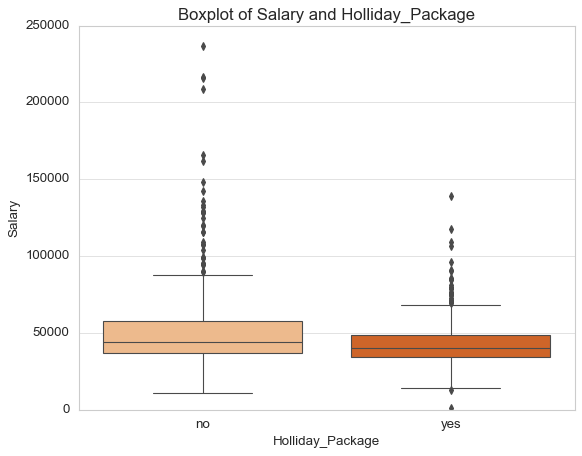

In [154]:
sns.boxplot(y='Salary', x='Holliday_Package', data=holid_df, palette='Oranges')
plt.title('Boxplot of Salary and Holliday_Package',fontsize=15);


In [155]:
holid_df[(holid_df.Salary > 50000)]['Holliday_Package'].value_counts()

no     180
yes     88
Name: Holliday_Package, dtype: int64

Employees having high salary(above 50000) mostly don’t opt for holiday package

                Pairplot


<Figure size 960x1200 with 0 Axes>

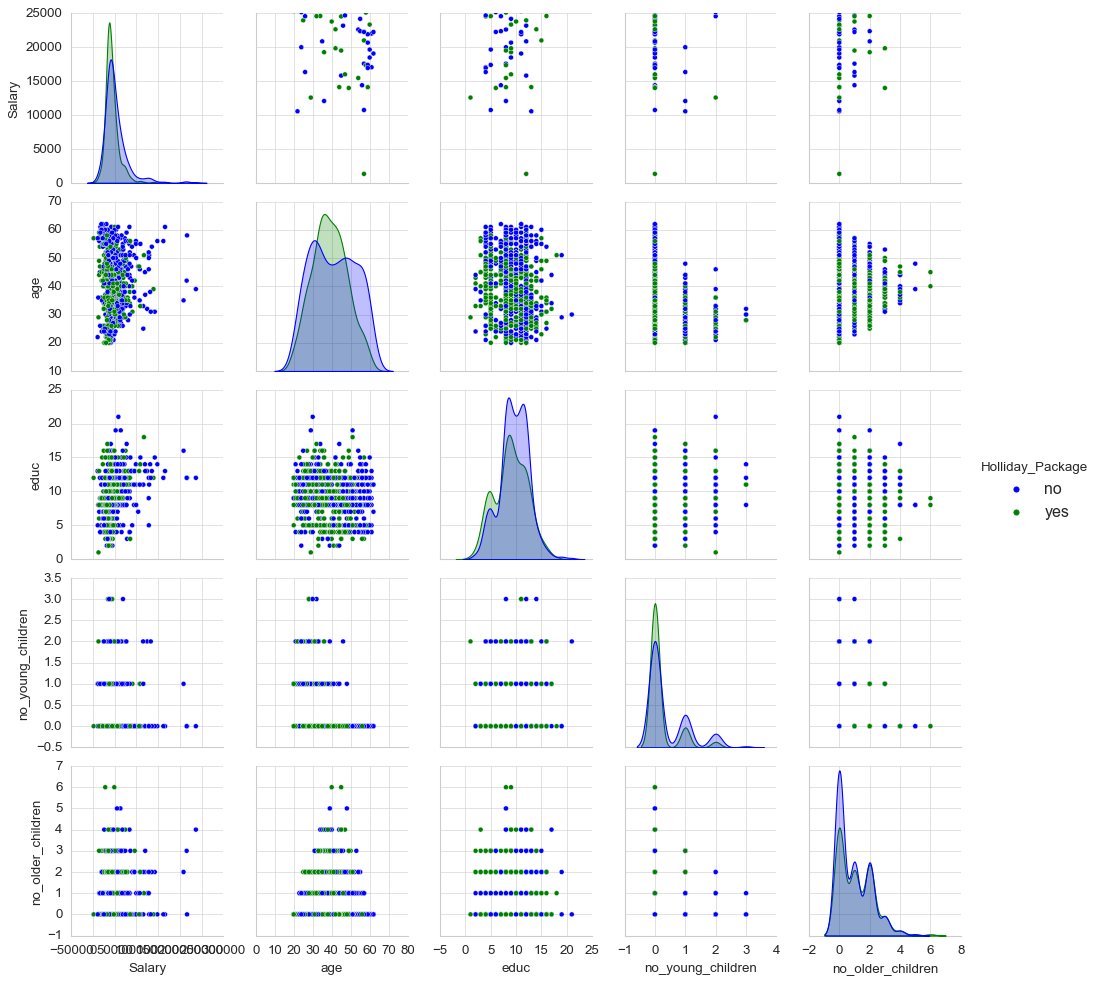

In [156]:
plt.figure(figsize=(12,15));
print('                Pairplot');
g=sns.pairplot(holid_df, corner=False, hue='Holliday_Package');
g.axes[0,0].set_ylim((0,25000))

plt.show();

As the age increases the people with younger children opting for the holiday package decreases.

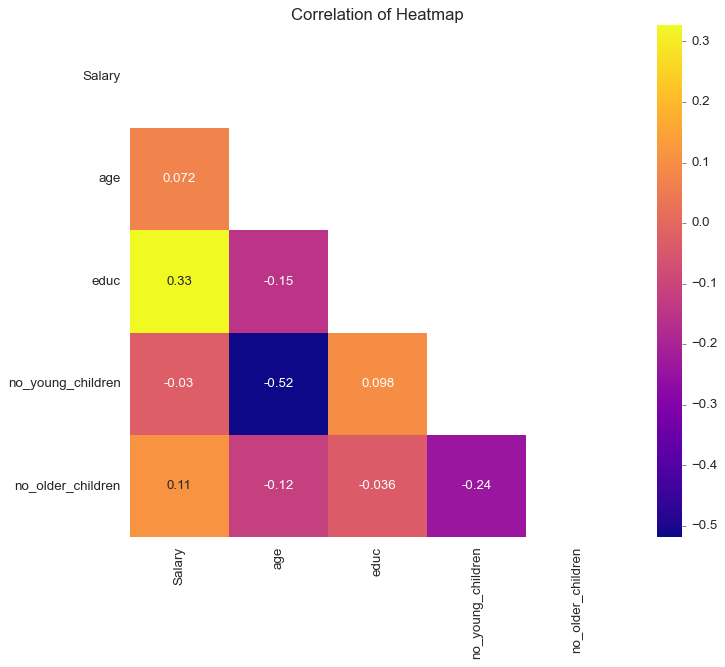

In [157]:
corr=holid_df_num.corr()
mask = np.triu(np.ones_like(corr)) 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,cmap='plasma',mask=mask);
plt.title('Correlation of Heatmap',fontsize=15);


From the heatmap and pairplot we can say that age has a negative correlation with no_young_children which explains the fact that as a person ages the number of younger children they have decreases.

## Multivariate Analysis

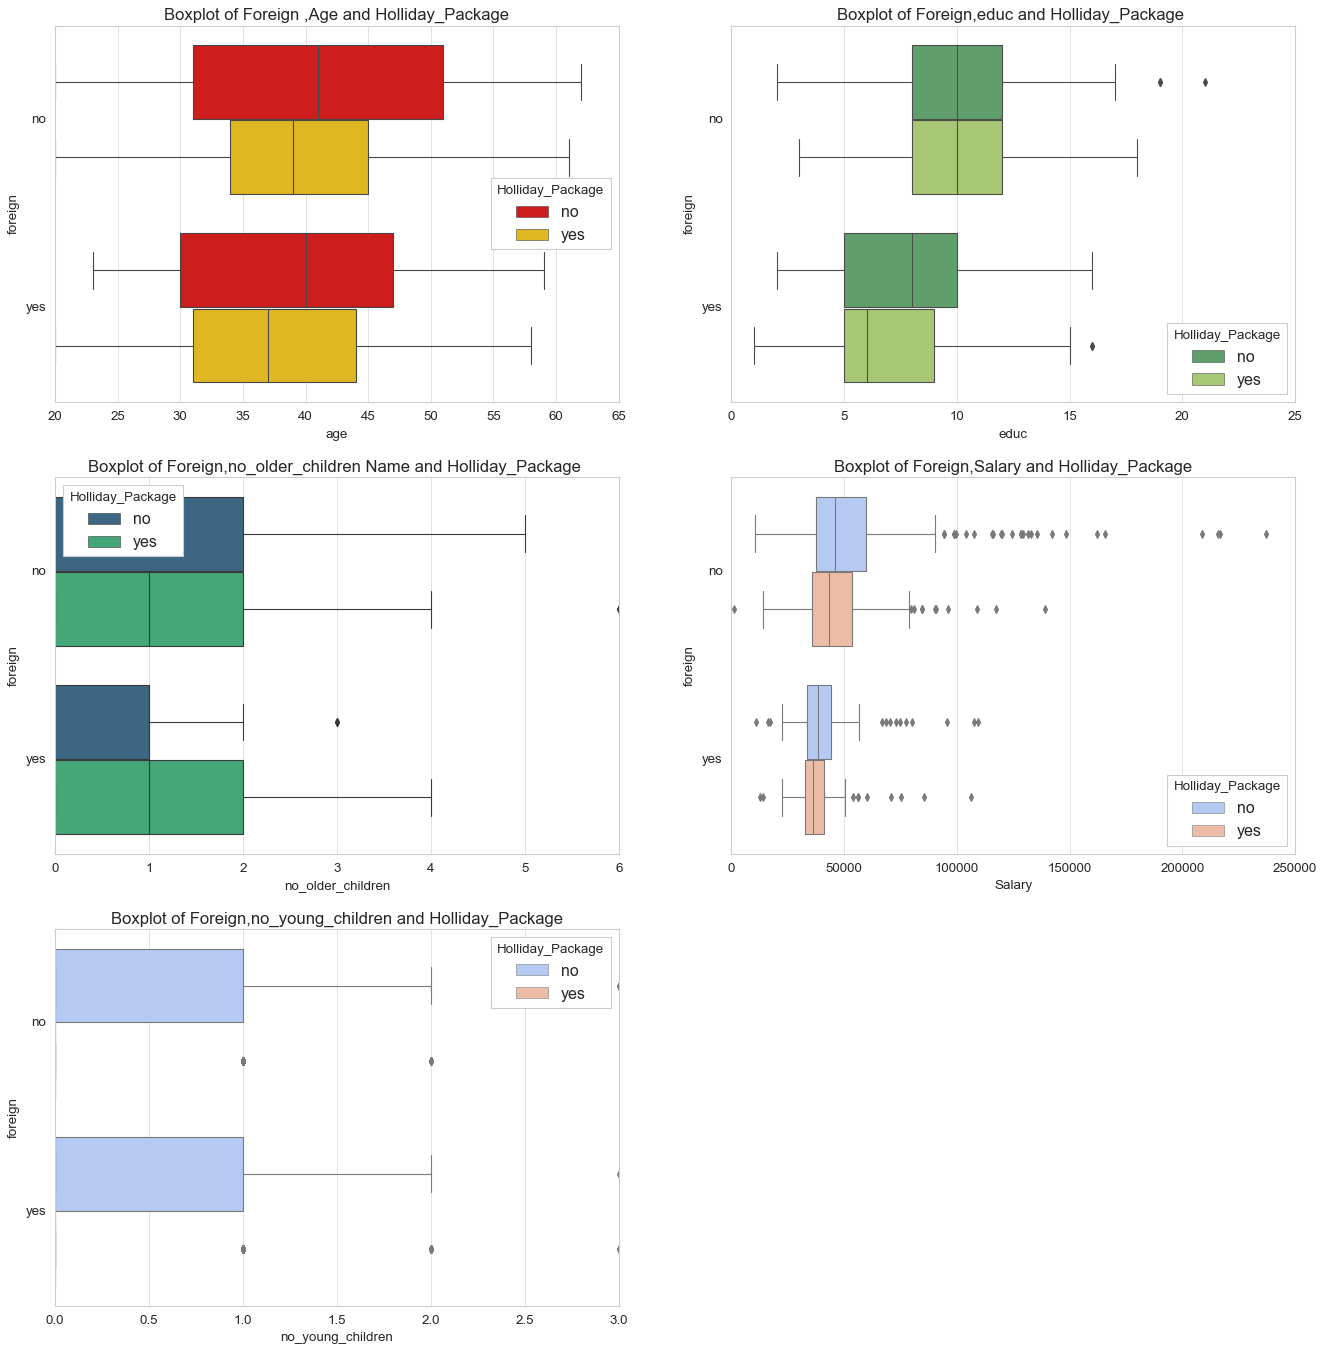

In [158]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(y='foreign', x='age', hue='Holliday_Package', data=holid_df, palette='hot')
plt.title('Boxplot of Foreign ,Age and Holliday_Package',fontsize=15)

plt.subplot(3,2,2)
sns.boxplot(y='foreign', x='educ',hue='Holliday_Package', data=holid_df, palette='summer')
plt.title('Boxplot of Foreign,educ and Holliday_Package ',fontsize=15)

plt.subplot(3,2,3)
sns.boxplot(y='foreign', x='no_older_children',hue='Holliday_Package', data=holid_df, palette='viridis')
plt.title('Boxplot of Foreign,no_older_children Name and Holliday_Package ',fontsize=15)

plt.subplot(3,2,4)
sns.boxplot(y='foreign', x='Salary',hue='Holliday_Package', data=holid_df, palette='coolwarm')
plt.title('Boxplot of Foreign,Salary and Holliday_Package',fontsize=15);

plt.subplot(3,2,5)
sns.boxplot(y='foreign', x='no_young_children',hue='Holliday_Package', data=holid_df, palette='coolwarm')
plt.title('Boxplot of Foreign,no_young_children and Holliday_Package',fontsize=15);



Foreigners with less older children are not opting the package. Foreigners willing to opt for package has less years in formal education than non foreigners.

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).


In [159]:
holid_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [160]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()
holid_df['Holliday_Package'] = LE.fit_transform(holid_df['Holliday_Package'])
holid_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,no
1,1,37207,45,8,0,1,no
2,0,58022,46,9,0,0,no
3,0,66503,31,11,2,0,no
4,0,66734,44,12,0,2,no


In [161]:
#for column in holid_df.columns:
#if holid_df[column].dtype == 'object':
holid_df['foreign'] = pd.Categorical(holid_df['foreign']).codes
holid_df.dtypes

Holliday_Package     int32
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign               int8
dtype: object

In [162]:
holid_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [163]:
X=holid_df.drop('Holliday_Package',axis=1)
y=holid_df['Holliday_Package']
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [164]:
print('y labels value counts percentage:\n ',y.value_counts(normalize=True),'\n train labels value counts:\n',train_labels.value_counts(normalize=True),'\n test labels value counts:\n',test_labels.value_counts(normalize=True))

y labels value counts percentage:
  0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64 
 train labels value counts:
 0    0.534426
1    0.465574
Name: Holliday_Package, dtype: float64 
 test labels value counts:
 0    0.553435
1    0.446565
Name: Holliday_Package, dtype: float64


The target classes are in similar proportion in the whole dataset, train and test set.

### Model 1

### Logistic Regression

In [165]:
log_model = LogisticRegression()
log_model.fit(X_train, train_labels)


LogisticRegression()

In [166]:
log_pred_train_class = log_model.predict(X_train)
log_pred_test_class = log_model.predict(X_test)

In [167]:
log_pred_test_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Model 2

### Linear Discriminant Analysis(LDA)

In [168]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,train_labels)


LinearDiscriminantAnalysis()

In [169]:
lda_pred_train_class = lda_model.predict(X_train)
lda_pred_test_class = lda_model.predict(X_test)


In [170]:
lda_pred_test_class

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

### Model 3

### GridSearchCV - Logistic Regression

In [171]:
grid1={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','saga','newton-cg'],
      'tol':[0.0001,0.00001]}

In [172]:
log_model2 = LogisticRegression(max_iter=10000,random_state=1)
grid_search1 = GridSearchCV(estimator = log_model2, param_grid = grid1, cv = 3,n_jobs=-1,scoring='recall')

In [173]:
grid_search1.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='recall')

In [174]:
best_model1 = grid_search1.best_estimator_

In [175]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg')


In [176]:
log_pred_train_class2 = best_model1.predict(X_train)
log_pred_test_class2 = best_model1.predict(X_test)

In [177]:
ytest_predict_prob2=best_model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob2).head()

,0,1
0,0.753599,0.246401
1,0.287308,0.712692
2,0.888743,0.111257
3,0.974783,0.025217
4,0.499096,0.500904


### Model 4

### GridSearchCV - LDA

In [178]:
grid2={'solver':['svd','lsqr','eigen']}
      


In [179]:
lda_model2 = LinearDiscriminantAnalysis()
grid_search2 = GridSearchCV(estimator = lda_model2, param_grid = grid2, cv = 3,n_jobs=-1,scoring='recall')

In [180]:
grid_search2.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, scoring='recall')

In [181]:
best_model2 = grid_search2.best_estimator_

In [182]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [183]:
lda_pred_train_class2 = best_model2.predict(X_train)
lda_pred_test_class2 = best_model2.predict(X_test)

In [184]:
ytest_predict_prob2=best_model2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob2).head()

,0,1
0,0.736312,0.263688
1,0.277893,0.722107
2,0.887243,0.112757
3,0.967803,0.032197
4,0.523170,0.476830


## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.


### Model 1

### Logistic Regression

#### Classification Report - Train

In [185]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels,log_pred_train_class))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



In [186]:
log_train_classifRepo = classification_report(train_labels,log_pred_train_class,output_dict=True)
log_train = pd.DataFrame(log_train_classifRepo).transpose()
log_train_precision = round(log_train.loc["1"][0],2)
log_train_recall = round(log_train.loc["1"][1],2)
log_train_f1 = round(log_train.loc["1"][2],2)
print ('Logistic Regression Train precision :',log_train_precision)
print ('Logistic Regression Train recall : ',log_train_recall)
print ('Logistic Regression Train f1 : ',log_train_f1)


Logistic Regression Train precision : 0.42
Logistic Regression Train recall :  0.08
Logistic Regression Train f1 :  0.14


#### Classification Report - Test

In [187]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,log_pred_test_class))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



In [188]:
log_test_classifRepo = classification_report(test_labels,log_pred_test_class,output_dict=True)
log_test = pd.DataFrame(log_test_classifRepo).transpose()
log_test_precision = round(log_test.loc["1"][0],2)
log_test_recall = round(log_test.loc["1"][1],2)
log_test_f1 = round(log_test.loc["1"][2],2)
print ('Logistic Regression Test precision :',log_test_precision)
print ('Logistic Regression Test recall : ',log_test_recall)
print ('Logistic Regression Test f1 : ',log_test_f1)


Logistic Regression Test precision : 0.38
Logistic Regression Test recall :  0.09
Logistic Regression Test f1 :  0.14


#### Confusion Matrix - Train

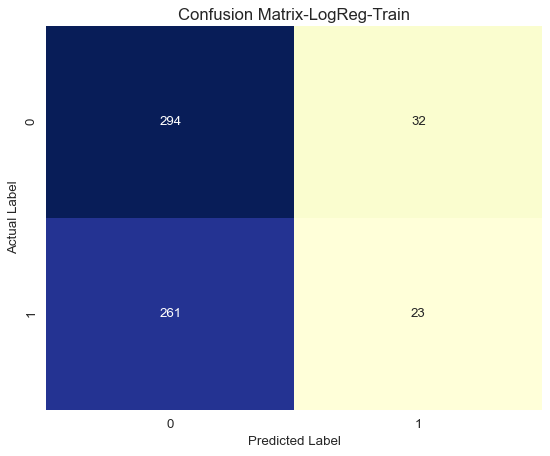

In [189]:
sns.heatmap(confusion_matrix(train_labels, log_pred_train_class),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-Train',fontsize=15)
plt.show();


#### Confusion Matrix - Test

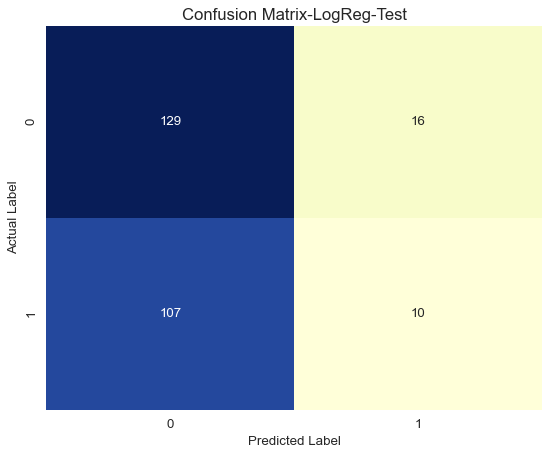

In [190]:
sns.heatmap(confusion_matrix(test_labels, log_pred_test_class),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-Test',fontsize=15)
plt.show();


#### Accuracy Score- Train and Test

In [191]:
log_train_accu = log_model.score(X_train,train_labels)
print("Accuracy score of Logistic Regression Trained data is ",round(log_train_accu,2))

Accuracy score of Logistic Regression Trained data is  0.52


In [192]:
log_test_accu = log_model.score(X_test,test_labels)
print("Accuracy score of Logistic Regression Trained data is ",round(log_test_accu,2))

Accuracy score of Logistic Regression Trained data is  0.53


#### ROC Curve and AUC Score - Train

AUC Score for logReg train data: 0.567


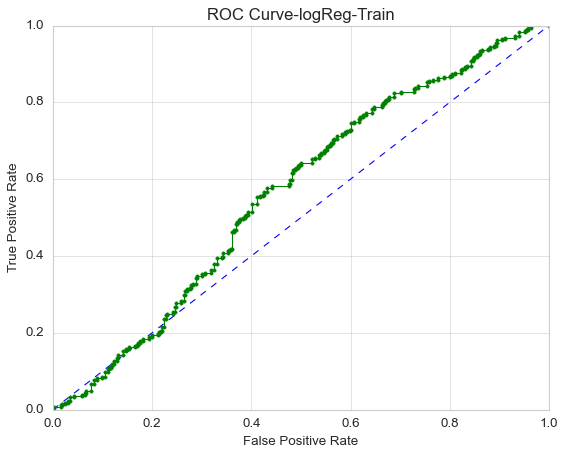

In [193]:
probs = log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(train_labels, probs)
print('AUC Score for logReg train data: %.3f' % log_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')
plt.title('ROC Curve-logReg-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

#### ROC Curve and AUC Score - Test

AUC Score for logReg test data: 0.627


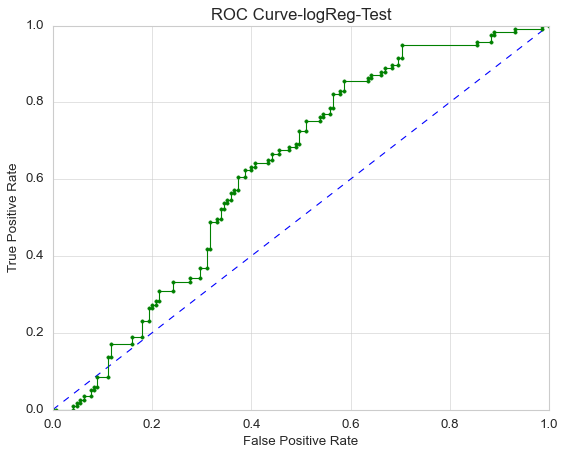

In [194]:
probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(test_labels, probs)
print('AUC Score for logReg test data: %.3f' % log_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')
plt.title('ROC Curve-logReg-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 2

### Linear Discriminant Analysis(LDA)

#### Classification Report - Train

In [195]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels,lda_pred_train_class))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [196]:
lda_train_classifRepo = classification_report(train_labels,lda_pred_train_class,output_dict=True)
lda_train = pd.DataFrame(lda_train_classifRepo).transpose()
lda_train_precision = round(lda_train.loc["1"][0],2)
lda_train_recall = round(lda_train.loc["1"][1],2)
lda_train_f1 = round(lda_train.loc["1"][2],2)
print ('LDA Train precision :',lda_train_precision)
print ('LDA Train recall : ',lda_train_recall)
print ('LDA Train f1 : ',lda_train_f1)


LDA Train precision : 0.68
LDA Train recall :  0.56
LDA Train f1 :  0.61


#### Classification Report - Test

In [197]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,lda_pred_test_class))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [198]:
lda_test_classifRepo = classification_report(test_labels,lda_pred_test_class,output_dict=True)
lda_test = pd.DataFrame(lda_test_classifRepo).transpose()
lda_test_precision = round(lda_test.loc["1"][0],2)
lda_test_recall = round(lda_test.loc["1"][1],2)
lda_test_f1 = round(lda_test.loc["1"][2],2)
print ('LDA Test precision :',lda_test_precision)
print ('LDA Test recall : ',lda_test_recall)
print ('LDA Test f1 : ',lda_test_f1)


LDA Test precision : 0.61
LDA Test recall :  0.56
LDA Test f1 :  0.58


#### Confusion Matrix - Train

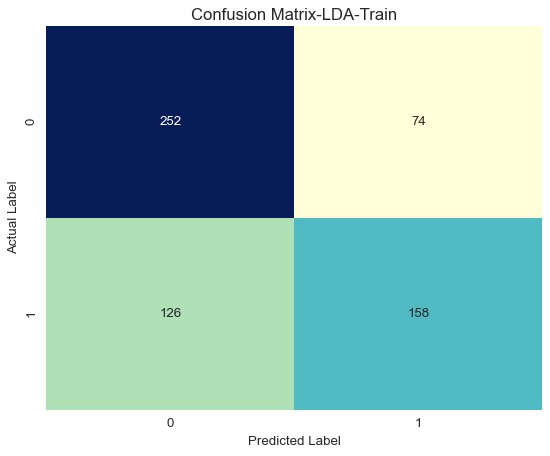

In [199]:
sns.heatmap(confusion_matrix(train_labels, lda_pred_train_class),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-Train',fontsize=15)
plt.show();


#### Confusion Matrix - Test

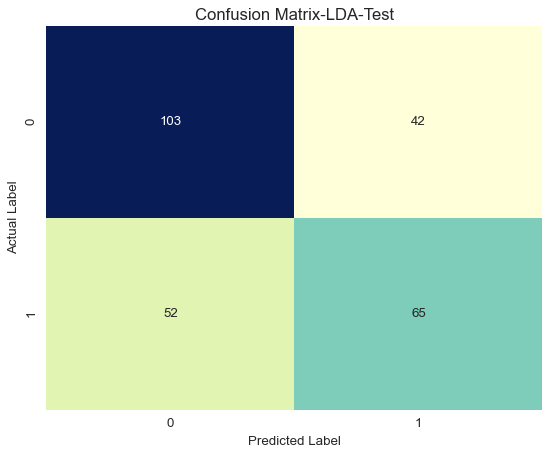

In [200]:
sns.heatmap(confusion_matrix(test_labels, lda_pred_test_class),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-Test',fontsize=15)
plt.show();


#### Accuracy Score- Train and Test

In [201]:
lda_train_accu = lda_model.score(X_train,train_labels)
print("Accuracy score of LDA Trained data is ",round(lda_train_accu,2))

Accuracy score of LDA Trained data is  0.67


In [202]:
lda_test_accu = lda_model.score(X_test,test_labels)
print("Accuracy score of LDA Trained data is ",round(lda_test_accu,2))

Accuracy score of LDA Trained data is  0.64


#### ROC Curve and AUC Score - Train

AUC Score for LDA train data: 0.742


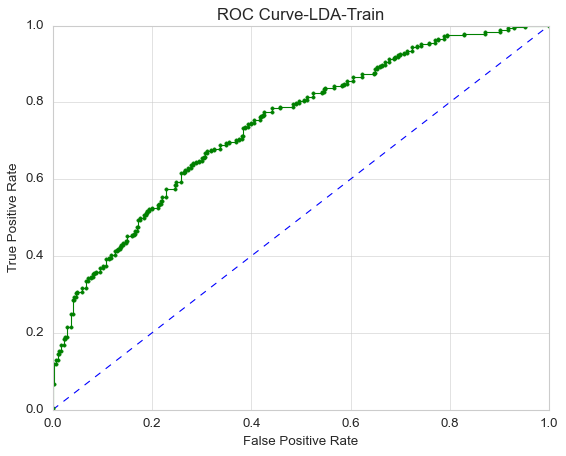

In [203]:
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC Score for LDA train data: %.3f' % lda_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.')
plt.title('ROC Curve-LDA-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

#### ROC Curve and AUC Score - Test

AUC Score for LDA test data: 0.703


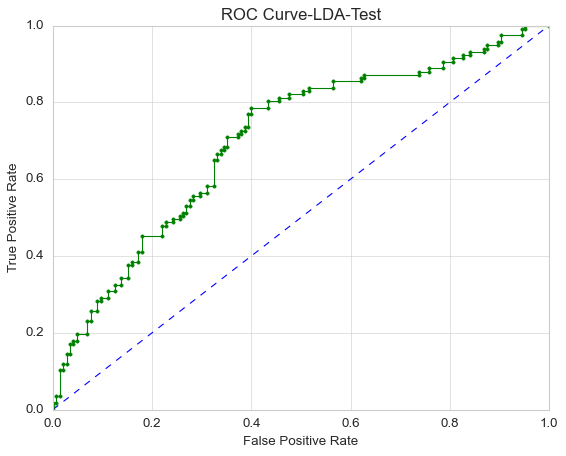

In [204]:
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC Score for LDA test data: %.3f' % lda_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.')
plt.title('ROC Curve-LDA-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 3

### GridSearchCV - Logistic Regression

#### Classification Report - Train

In [205]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels,log_pred_train_class2))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



In [206]:
log_train_classifRepo2 = classification_report(train_labels,log_pred_train_class2,output_dict=True)
log_train2 = pd.DataFrame(log_train_classifRepo2).transpose()
log_train_precision2 = round(log_train2.loc["1"][0],2)
log_train_recall2 = round(log_train2.loc["1"][1],2)
log_train_f1_2 = round(log_train2.loc["1"][2],2)
print ('Logistic Regression Train precision :',log_train_precision2)
print ('Logistic Regression Train recall : ',log_train_recall2)
print ('Logistic Regression Train f1 : ',log_train_f1_2)


Logistic Regression Train precision : 0.69
Logistic Regression Train recall :  0.57
Logistic Regression Train f1 :  0.63


#### Classification Report - Test

In [207]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,log_pred_test_class2))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [208]:
log_test_classifRepo2 = classification_report(test_labels,log_pred_test_class2,output_dict=True)
log_test2 = pd.DataFrame(log_test_classifRepo2).transpose()
log_test_precision2 = round(log_test2.loc["1"][0],2)
log_test_recall2 = round(log_test2.loc["1"][1],2)
log_test_f1_2 = round(log_test2.loc["1"][2],2)
print ('Logistic Regression Test precision :',log_test_precision2)
print ('Logistic Regression Test recall : ',log_test_recall2)
print ('Logistic Regression Test f1 : ',log_test_f1_2)


Logistic Regression Test precision : 0.61
Logistic Regression Test recall :  0.57
Logistic Regression Test f1 :  0.59


#### Confusion Matrix - Train

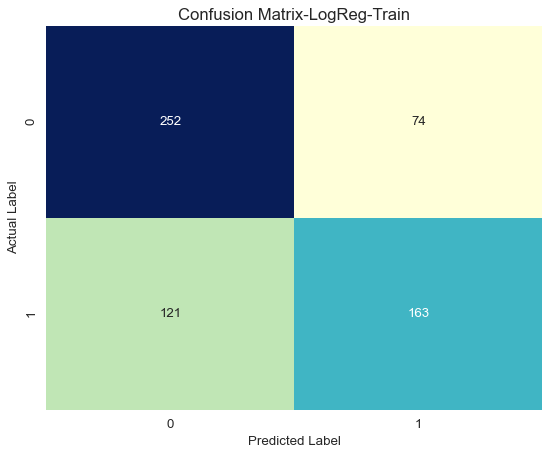

In [209]:
sns.heatmap(confusion_matrix(train_labels, log_pred_train_class2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-Train',fontsize=15)
plt.show();


#### Confusion Matrix - Test

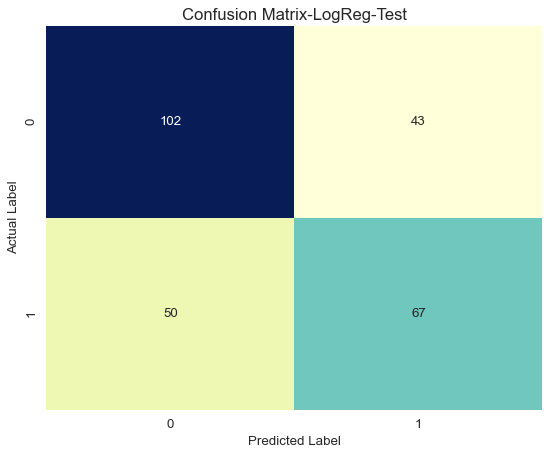

In [210]:
sns.heatmap(confusion_matrix(test_labels, log_pred_test_class2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LogReg-Test',fontsize=15)
plt.show();


#### Accuracy Score- Train and Test

In [211]:
log_train_accu2 = best_model1.score(X_train,train_labels)
print("Accuracy score of Logistic Regression Trained data is ",round(log_train_accu2,2))

Accuracy score of Logistic Regression Trained data is  0.68


In [212]:
log_test_accu2 = best_model1.score(X_test,test_labels)
print("Accuracy score of Logistic Regression Trained data is ",round(log_test_accu2,2))

Accuracy score of Logistic Regression Trained data is  0.65


#### ROC Curve and AUC Score - Train

AUC Score for logReg train data: 0.743


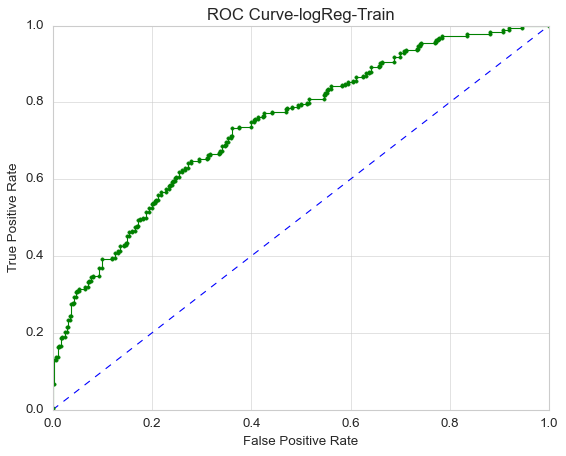

In [213]:
probs3 = best_model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc2 = roc_auc_score(train_labels, probs3)
print('AUC Score for logReg train data: %.3f' % log_train_auc2)
# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr2, log_train_tpr2, log_train_thresholds2 = roc_curve(train_labels, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr2, log_train_tpr2, marker='.')
plt.title('ROC Curve-logReg-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

#### ROC Curve and AUC Score - Test

AUC Score for logReg test data: 0.705


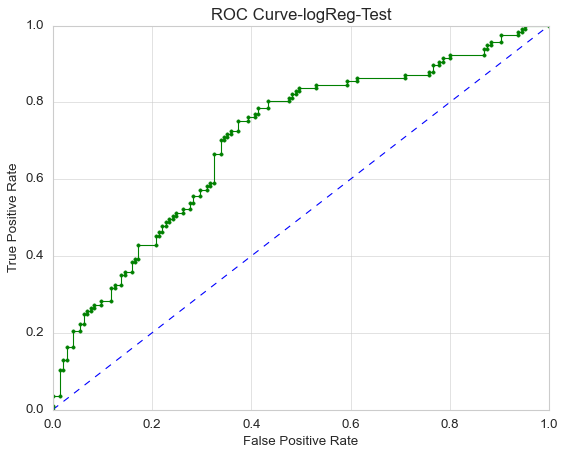

In [214]:
probs3 = best_model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc2 = roc_auc_score(test_labels, probs3)
print('AUC Score for logReg test data: %.3f' % log_test_auc2)
# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr2, log_test_tpr2, log_test_thresholds2 = roc_curve(test_labels, probs3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr2, log_test_tpr2, marker='.')
plt.title('ROC Curve-logReg-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Model 4

### GridSearchCV - LDA

#### Classification Report - Train

In [215]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels,lda_pred_train_class2))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [216]:
lda_train_classifRepo2 = classification_report(train_labels,lda_pred_train_class2,output_dict=True)
lda_train2 = pd.DataFrame(lda_train_classifRepo2).transpose()
lda_train_precision2 = round(lda_train2.loc["1"][0],2)
lda_train_recall2 = round(lda_train2.loc["1"][1],2)
lda_train_f1_2 = round(lda_train2.loc["1"][2],2)
print ('LDA Train precision :',lda_train_precision2)
print ('LDA Train recall : ',lda_train_recall2)
print ('LDA Train f1 : ',lda_train_f1_2)


LDA Train precision : 0.68
LDA Train recall :  0.56
LDA Train f1 :  0.61


#### Classification Report - Test

In [217]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,lda_pred_test_class2))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [218]:
lda_test_classifRepo2 = classification_report(test_labels,lda_pred_test_class2,output_dict=True)
lda_test2 = pd.DataFrame(lda_test_classifRepo2).transpose()
lda_test_precision2 = round(lda_test2.loc["1"][0],2)
lda_test_recall2 = round(lda_test2.loc["1"][1],2)
lda_test_f1_2 = round(lda_test2.loc["1"][2],2)
print ('LDA Test precision :',lda_test_precision2)
print ('LDA Test recall : ',lda_test_recall2)
print ('LDA Test f1 : ',lda_test_f1_2)


LDA Test precision : 0.61
LDA Test recall :  0.56
LDA Test f1 :  0.58


#### Confusion Matrix - Train

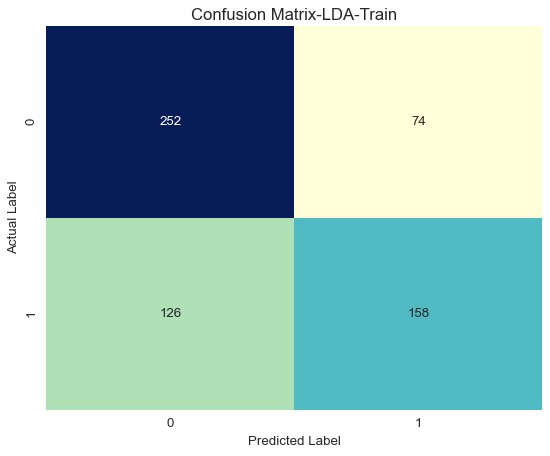

In [219]:
sns.heatmap(confusion_matrix(train_labels, lda_pred_train_class2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-Train',fontsize=15)
plt.show();


#### Confusion Matrix - Test

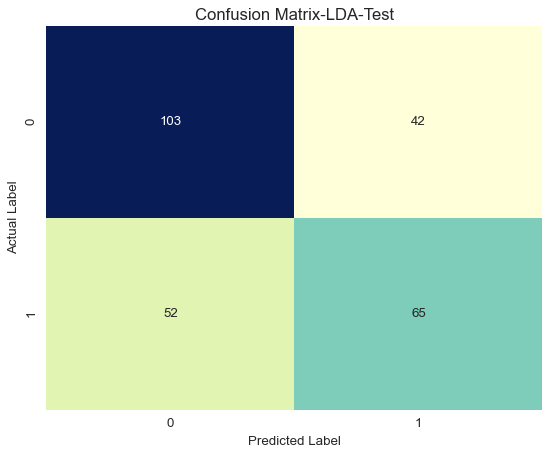

In [220]:
sns.heatmap(confusion_matrix(test_labels, lda_pred_test_class2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-LDA-Test',fontsize=15)
plt.show();


#### Accuracy Score- Train and Test

In [221]:
lda_train_accu = best_model2.score(X_train,train_labels)
print("Accuracy score of LDA Trained data is ",round(lda_train_accu,2))

Accuracy score of LDA Trained data is  0.67


In [222]:
lda_test_accu = best_model2.score(X_test,test_labels)
print("Accuracy score of LDA Trained data is ",round(lda_test_accu,2))

Accuracy score of LDA Trained data is  0.64


#### ROC Curve and AUC Score - Train

AUC Score for LDA train data: 0.742


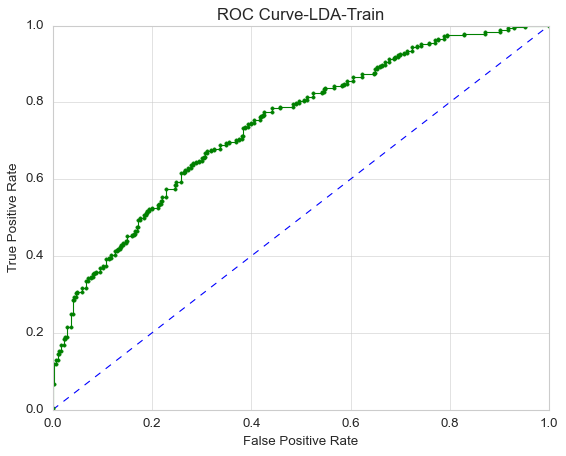

In [223]:
pred_prob_train = best_model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
pred_prob_train = pred_prob_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc2 = roc_auc_score(train_labels, pred_prob_train)
print('AUC Score for LDA train data: %.3f' % lda_train_auc2)
# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr2, lda_train_tpr2, lda_train_thresholds2 = roc_curve(train_labels, pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr2, lda_train_tpr2, marker='.')
plt.title('ROC Curve-LDA-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

#### ROC Curve and AUC Score - Test

AUC Score for LDA test data: 0.703


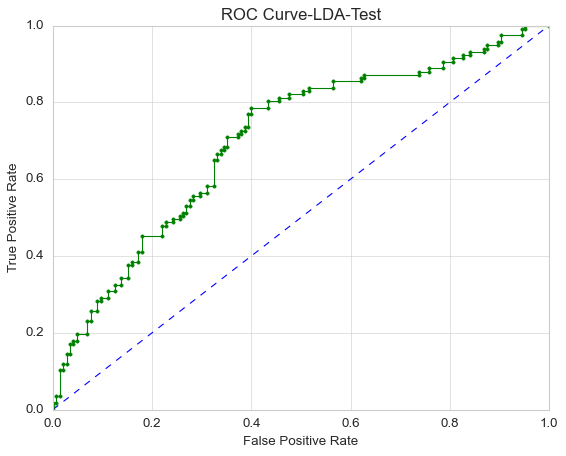

In [224]:
pred_prob_test = best_model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
pred_prob_test = pred_prob_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lda_test_auc2 = roc_auc_score(test_labels, pred_prob_test)
print('AUC Score for LDA test data: %.3f' % lda_test_auc2)
# calculate roc curve
from sklearn.metrics import roc_curve
lda_test_fpr2, lda_test_tpr2, lda_test_thresholds2 = roc_curve(test_labels, pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr2, lda_test_tpr2, marker='.')
plt.title('ROC Curve-LDA-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Different cut-off values with Confusion Matrix and Classification Report

0.1 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.94      0.05      0.10       326
           1       0.48      1.00      0.65       284

    accuracy                           0.49       610
   macro avg       0.71      0.52      0.37       610
weighted avg       0.73      0.49      0.35       610
 



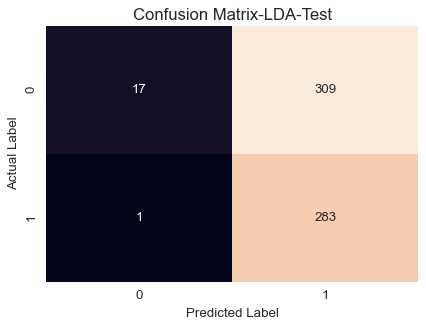

0.2 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.89      0.15      0.26       326
           1       0.50      0.98      0.66       284

    accuracy                           0.54       610
   macro avg       0.70      0.56      0.46       610
weighted avg       0.71      0.54      0.45       610
 



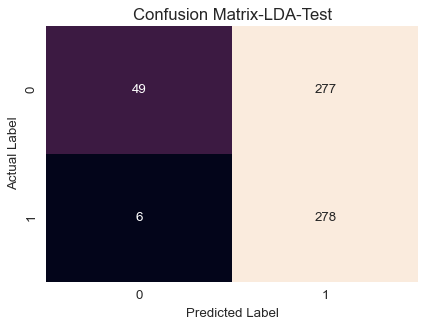

0.3 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.78      0.34      0.48       326
           1       0.54      0.89      0.67       284

    accuracy                           0.60       610
   macro avg       0.66      0.62      0.58       610
weighted avg       0.67      0.60      0.57       610
 



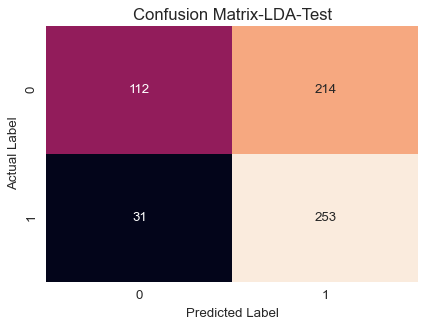

0.4 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.73      0.60      0.66       326
           1       0.62      0.75      0.68       284

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.68      0.67      0.67       610
 



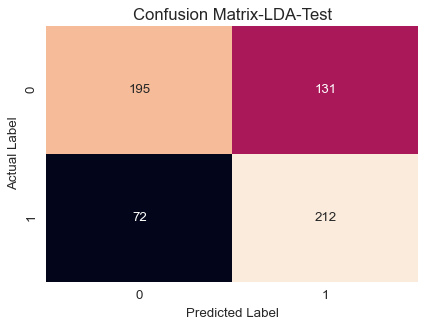

0.5 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 



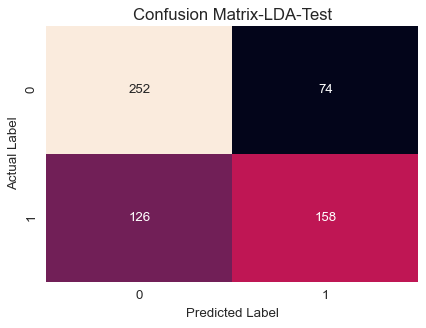

0.6 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.63      0.87      0.73       326
           1       0.73      0.42      0.54       284

    accuracy                           0.66       610
   macro avg       0.68      0.64      0.63       610
weighted avg       0.68      0.66      0.64       610
 



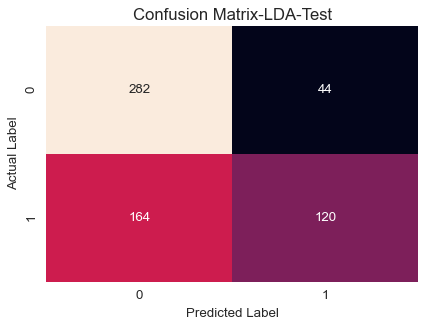

0.7 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.61      0.94      0.74       326
           1       0.81      0.32      0.46       284

    accuracy                           0.65       610
   macro avg       0.71      0.63      0.60       610
weighted avg       0.70      0.65      0.61       610
 



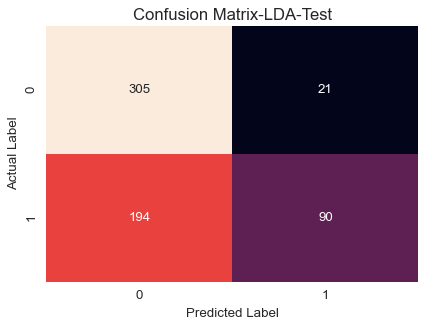

0.8 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.57      0.98      0.72       326
           1       0.90      0.16      0.27       284

    accuracy                           0.60       610
   macro avg       0.74      0.57      0.50       610
weighted avg       0.73      0.60      0.51       610
 



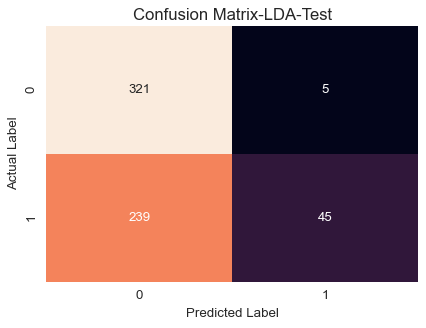

0.9 

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.54      1.00      0.70       326
           1       1.00      0.02      0.03       284

    accuracy                           0.54       610
   macro avg       0.77      0.51      0.37       610
weighted avg       0.75      0.54      0.39       610
 



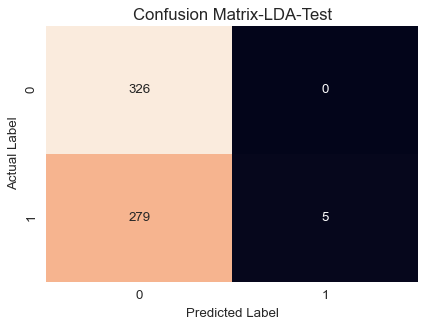

In [225]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]
    for i in range(0,len(train_labels)):
        if np.array(pred_prob_train[i]) > custom_prob:
            #greater than the custom cutoff value
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    #print('Accuracy Score',round(best_model2.accuracy_score(train_labels,custom_cutoff_data),4))
    #print('Recall',round(best_model2.recall(train_labels,custom_cutoff_data),4))
    #print('F1 Score',round(best_model2.f1_score(train_labels,custom_cutoff_data),4),'\n')
    print('Classification Report of the custom cut-off train data:\n\n',classification_report(train_labels,custom_cutoff_data),'\n')
    plt.figure(figsize=(6,4))
    #print('                  Confusion Matrix')
    sns.heatmap(confusion_matrix(train_labels, custom_cutoff_data),annot=True, fmt='d', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix-LDA-Test',fontsize=15),'\n\n'
    plt.show();

    #sns.heatmap(confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g')
    plt.show();

In [226]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test)):
    if np.array(pred_prob_test[i])>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

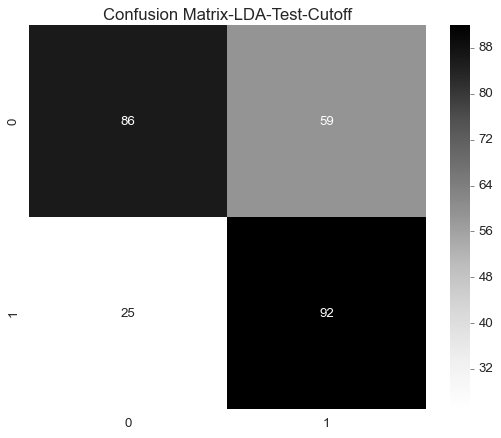

In [227]:
sns.heatmap((confusion_matrix(test_labels,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');
plt.title('Confusion Matrix-LDA-Test-Cutoff',fontsize=15);


In [228]:
print('Classification Report of the custom cut-off test data:\n\n',classification_report(test_labels,data_pred_custom_cutoff),'\n')

Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.59      0.67       145
           1       0.61      0.79      0.69       117

    accuracy                           0.68       262
   macro avg       0.69      0.69      0.68       262
weighted avg       0.70      0.68      0.68       262
 



In [229]:
custom_cutoff_data_train=[]
for i in range(0,len(train_labels)):
        if np.array(pred_prob_train[i]) > 0.4:
            #greater than the custom cutoff value
            a=1
        else:
            a=0
        custom_cutoff_data_train.append(a)


AUC Score for LDA train data: 0.672


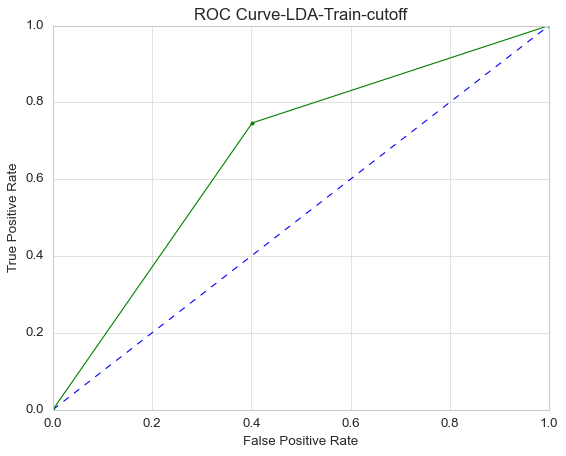

In [230]:
from sklearn.metrics import roc_auc_score
lda_train_auc_cutoff = roc_auc_score(train_labels, custom_cutoff_data_train)
print('AUC Score for LDA train data: %.3f' % lda_train_auc_cutoff)
# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr_cutoff, lda_train_tpr_cutoff, lda_train_thresholds_cutoff = roc_curve(train_labels, custom_cutoff_data_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr_cutoff, lda_train_tpr_cutoff, marker='.')
plt.title('ROC Curve-LDA-Train-cutoff',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for LDA test data: 0.690


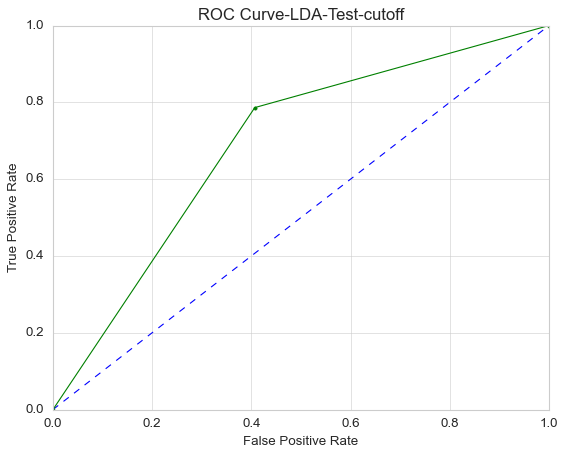

In [231]:
from sklearn.metrics import roc_auc_score
lda_test_auc_cutoff = roc_auc_score(test_labels, data_pred_custom_cutoff)
print('AUC Score for LDA test data: %.3f' % lda_test_auc_cutoff)
# calculate roc curve
from sklearn.metrics import roc_curve
lda_test_fpr_cutoff, lda_test_tpr_cutoff, lda_test_thresholds_cutoff = roc_curve(test_labels, data_pred_custom_cutoff)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr_cutoff, lda_test_tpr_cutoff, marker='.')
plt.title('ROC Curve-LDA-Test-cutoff',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.


In [232]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Model 1 Train':[log_train_accu,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
        'Model 1 Test':[log_test_accu,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Model 2 Train':[lda_train_accu,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'Model 2 Test':[lda_test_accu,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       'Model 3 Train':[log_train_accu2,log_train_auc2,log_train_recall2,log_train_precision2,log_train_f1_2],
        'Model 3 Test':[log_test_accu2,log_test_auc2,log_test_recall2,log_test_precision2,log_test_f1_2],
        'Model 4 Train':[0.67,lda_train_auc_cutoff,0.75,0.62,0.68],
        'Model 4 Test':[0.68,lda_test_auc_cutoff,0.79,0.61,0.69]},index=index)
round(data,2)


,Model 1 Train,Model 1 Test,Model 2 Train,Model 2 Test,Model 3 Train,Model 3 Test,Model 4 Train,Model 4 Test
Accuracy,0.52,0.53,0.67,0.64,0.68,0.65,0.67,0.68
AUC,0.57,0.63,0.74,0.70,0.74,0.70,0.67,0.69
Recall,0.08,0.09,0.56,0.56,0.57,0.57,0.75,0.79
Precision,0.42,0.38,0.68,0.61,0.69,0.61,0.62,0.61
F1 Score,0.14,0.14,0.61,0.58,0.63,0.59,0.68,0.69


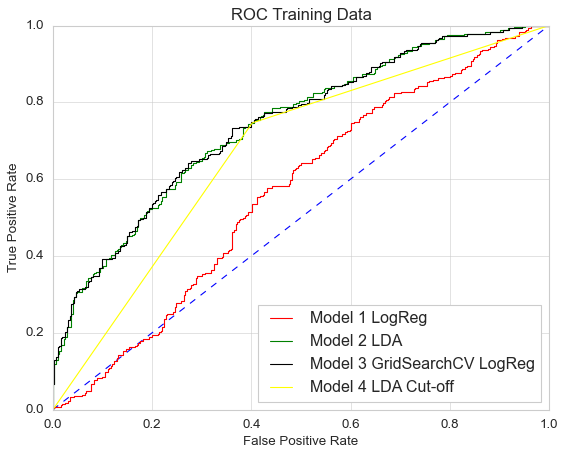

In [233]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='red',label="Model 1 LogReg")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="Model 2 LDA")
plt.plot(log_train_fpr2,log_train_tpr2,color='black',label="Model 3 GridSearchCV LogReg")
plt.plot(lda_train_fpr_cutoff,lda_train_tpr_cutoff,color='yellow',label="Model 4 LDA Cut-off")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training Data',fontsize=15)
plt.legend(loc='lower right');


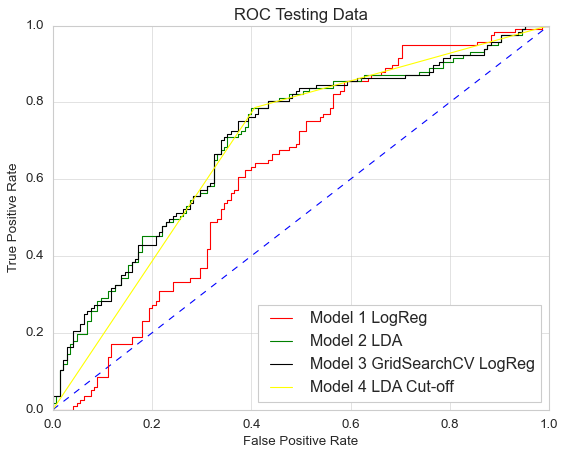

In [234]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr, log_test_tpr,color='red',label="Model 1 LogReg")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="Model 2 LDA")
plt.plot(log_test_fpr2,log_test_tpr2,color='black',label="Model 3 GridSearchCV LogReg")
plt.plot(lda_test_fpr_cutoff,lda_test_tpr_cutoff,color='yellow',label="Model 4 LDA Cut-off")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Testing Data',fontsize=15)
plt.legend(loc='lower right');


Out of all the 4 models, Model 4 has slightly better performance than the others which can be inferred from the above performance metrics. It also has a better recall value than others. So model 4 is the best/optimized model.


### Recommendations 
• Features such as gender, place of interest such as hill station, beaches, dessert and forest safari, etc could be considered as additional features .

•  The travel company can provide customised packages based on age groups, salary to attract employees to opt for respective packages.

• Foreign nationals can be given offers and specific packages based on their interest which will vary from that of non foreigners.

• The travel company can identify new features which can positively correlate the opting for a holiday package or not so that a better model can be built.

• Offers can be given based on number of children the employee has .

